# Problem Statement:
###### Avocado is a fruit consumed by people heavily in the United States. 

## Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

#### Some relevant columns in the dataset:
- ID - Unique Id of each  Observation.
- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold
- Total Bags- Total number  of bags sold.
- Small Bags-  Total number of  small bags sold.
- Large Bags- Total number  of small bags sold.
- XLarge Bags - Total number of Xlarge bags sold.

### Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

# Regression

In [1]:
# importing the librabries
import pandas as pd
import numpy as np

# Importing Dataset:

In [2]:
df=pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
## checking the shape of our dataset
df.shape

(18249, 14)

There are 18249 rows and 14 columns including target variable.

In [4]:
## checking basic information about dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


## Observation:
- There are 3 columns are object data-type present in our dataset.
- There are 10 columns are Numerical data-type present in our dataset.
- Seems there are no null values present in our dataset.
- `Unnamed` column is a nominal data, we will drop them.


## Double check is Null Values

In [5]:
df.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

## Checking duplicates:

In [6]:
df.duplicated().any()

False

## Stats of our dataset:

In [7]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


# Observation:
- Previous we observe that `Unnamed: 0` column is a nomial data-type, but after looking the maximum value of this column is 52, although we have 18249 rows. So we will check it before dropping it.
- Except `Total Volume` and `Year` column, every columns minimum value is zero.
- `XLarge Bags` column's mean is 3106.42 but standard deviation is 17692.8946, which is can't acceptable. Seems there is many outliers present in this column.
- `Year` column has only four category 2015 2016, 2017 and 2018.
- `4046`,`4225` and `4770`:- Based on the size of avocado PLU code is assigned by 4046,44225,4770.
- Average price of one avacado is 1.40 doller and  maximum and minimum price being 3.25 and 0.44 respectively.
- We have data from jan2015 to march 2018.

In [8]:
## Checking the nomial column.
df[['Unnamed: 0','Date']].tail(15)

,Unnamed: 0,Date
18234,9,2018-01-21
18235,10,2018-01-14
18236,11,2018-01-07
18237,0,2018-03-25
18238,1,2018-03-18
18239,2,2018-03-11
18240,3,2018-03-04
18241,4,2018-02-25
18242,5,2018-02-18
18243,6,2018-02-11


As we can see that the ID number depend on the date. whenever month is going to change the ID number become zero. So we conclude that it is a nominal datatype, we will drop it.

In [9]:
df=df.drop('Unnamed: 0',axis=1)

# `EDA:`

In [10]:
## importing necessary librabries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


Text(0.5, 1.0, 'Total Volume Per Year')

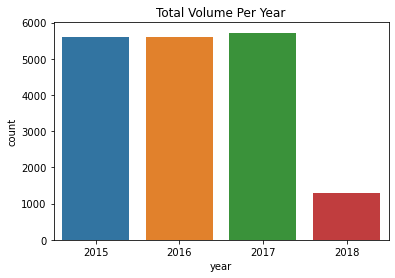

In [11]:
print(df['year'].value_counts())
sns.countplot(x='year',data=df)
plt.title('Total Volume Per Year')

Text(0.5, 1.0, 'AveragePrice Per year')

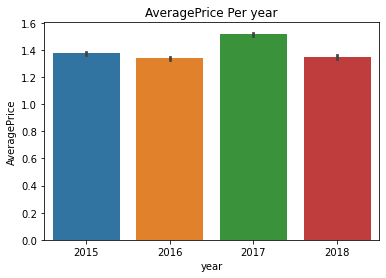

In [12]:
sns.barplot(x='year',y='AveragePrice',data=df)
plt.title('AveragePrice Per year')

## Obervation:
- Total Sales graph is going highest in 2017 with 5722 Million and then going down in 2018 by 1296 million.
- Average price is highest in 2017 at 1.51 doller and dropped in 2018 to 1.36 $.


<AxesSubplot:xlabel='year'>

<Figure size 1080x504 with 0 Axes>

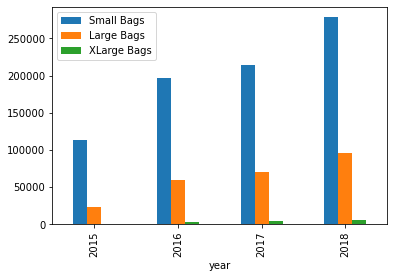

In [13]:
# status of bags sold
plt.figure(figsize=(15,7))
df.groupby(['year']).mean()[['Small Bags','Large Bags','XLarge Bags']].plot(kind='bar')


<AxesSubplot:xlabel='year', ylabel='Small Bags'>

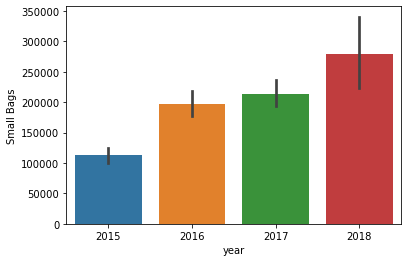

In [14]:
sns.barplot(y='Small Bags',x='year',data=df)

## Insights of above graphs
- In first graph we can see that Total Sales of avacado with small_bags was sold all time highest.
- And In same graph  we can see that Total sales of avacado with XLarge_bags was sold all time least.
- Even during drop of sales in 2018 the small bags avacado was sold highest. 

In [15]:
# Extracting month from date column
import datetime
df['Date']=pd.to_datetime(df['Date'])
    

In [16]:
df['Month']=df['Date'].dt.month

In [17]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [18]:
## Mapping the Months
df['Month']=df['Month'].replace({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',
                                 7:'july',8:'august',9:'sep',10:'oct',11:'nov',12:'dec'})
df.head(3)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,dec
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,dec
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,dec


Text(0.5, 1.0, 'AveragePrice Per Month')

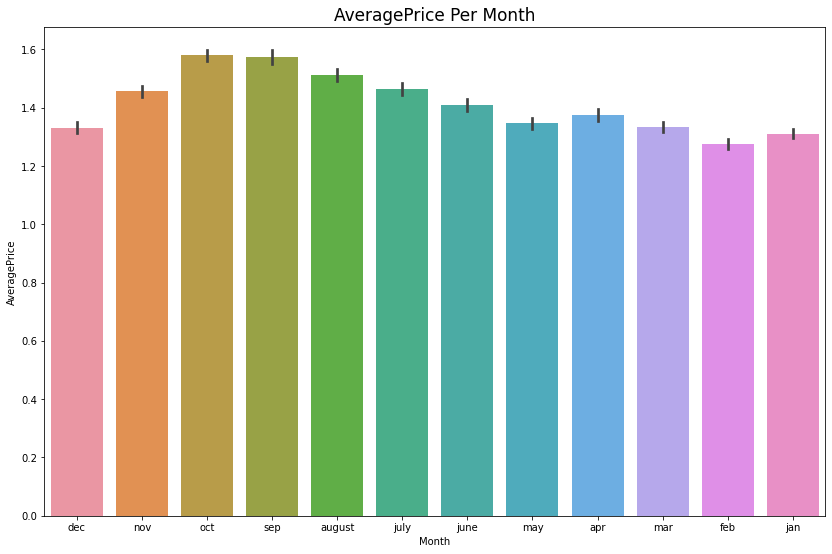

In [19]:
#plotting the Month vs average price
plt.figure(figsize=(14,9))
sns.barplot(x='Month',y='AveragePrice',data=df)
plt.title('AveragePrice Per Month',fontsize=17)

## Notice Points:
- Avacado price is continously increasing from may to oct.
- avacado price is starting droping from november.
- The highest price in oct month is 1.57
- The minimum price in feb month is 1.22

<AxesSubplot:xlabel='year'>

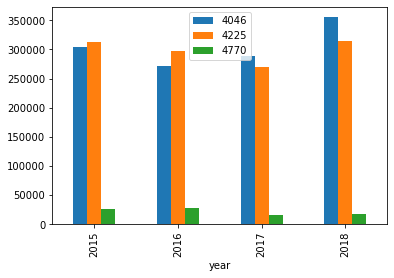

In [20]:
df.groupby(['year']).mean()[['4046','4225','4770']].plot(kind='bar')

# Based on PLU code plotting
- Most selling type is PLU 4225 in 2015 and 2016.
- Low selling type is PLU4770 at all time.
- But in 2017 and 2018, most selling type is PLU4046.


<AxesSubplot:xlabel='type', ylabel='count'>

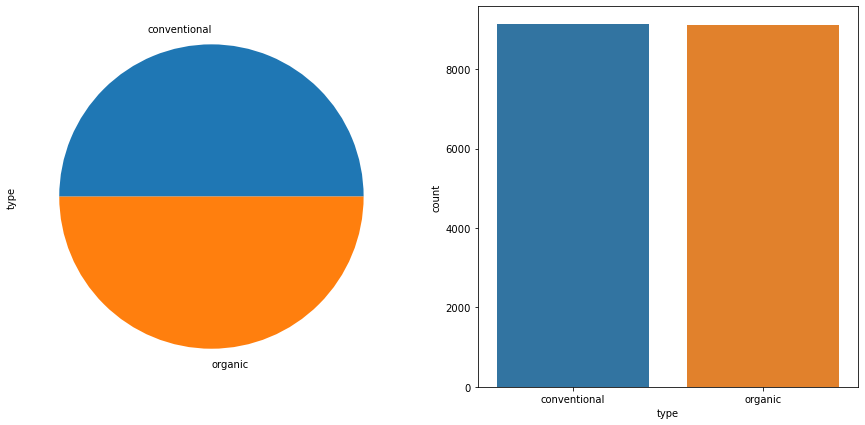

In [21]:
## type vs sale
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
df['type'].value_counts(normalize=True).plot.pie()
plt.subplot(1,2,2)
sns.countplot(df['type'])


## Observation:
- There are two types Organic and Coventional.
- Both the types are equal and balanced.

Text(0.5, 1.0, 'Total Volume Per Year with Type')

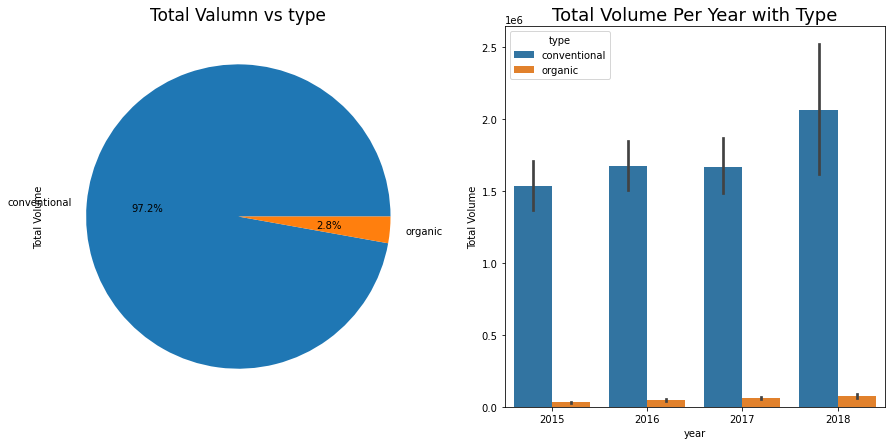

In [22]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
df.groupby(['type']).mean()['Total Volume'].plot.pie(autopct='%1.1f%%')
plt.title('Total Valumn vs type', fontsize=17)
plt.subplot(1,2,2)
sns.barplot(x='year',y='Total Volume',hue='type',data=df)
plt.title('Total Volume Per Year with Type', fontsize=18)

## Observation
- In above graphs we can see that the Conventional type was sold high. It contribute around 97.2 % of total volume.
- Organic type was sold very less, only 2.8 % contributed in total volume.
- In other hand in 2018 the conventional type was sold highest.



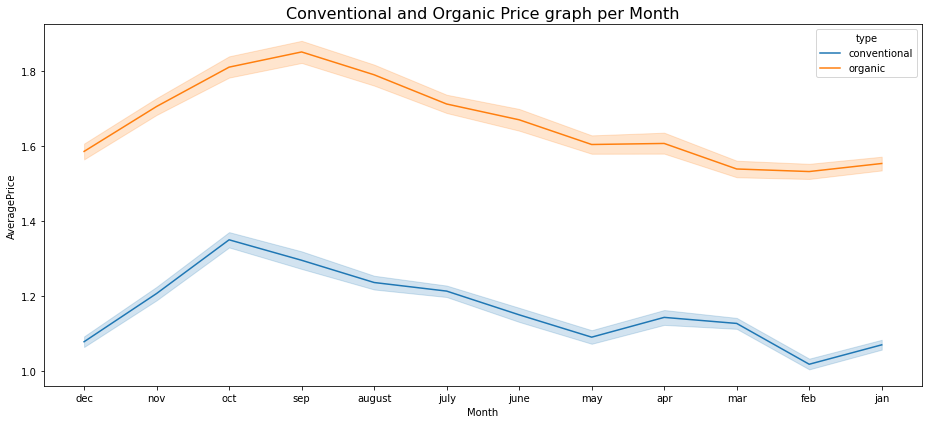

In [23]:
## plotting the type wise average price
plt.figure(figsize=(13,6))
sns.lineplot(x='Month',y='AveragePrice',hue='type',data=df)
plt.title('Conventional and Organic Price graph per Month',fontsize=16)
plt.tight_layout()

## Observation:
- The average price of Organic type avacado is high.
- Because of low price the  Conventional type was sold higher than Organic.
- The highest Average Price of Conventional and Organic type avacado in October and September respectvely.

# Region wise volume.

Text(0.5, 1.0, 'Region vs Volume')

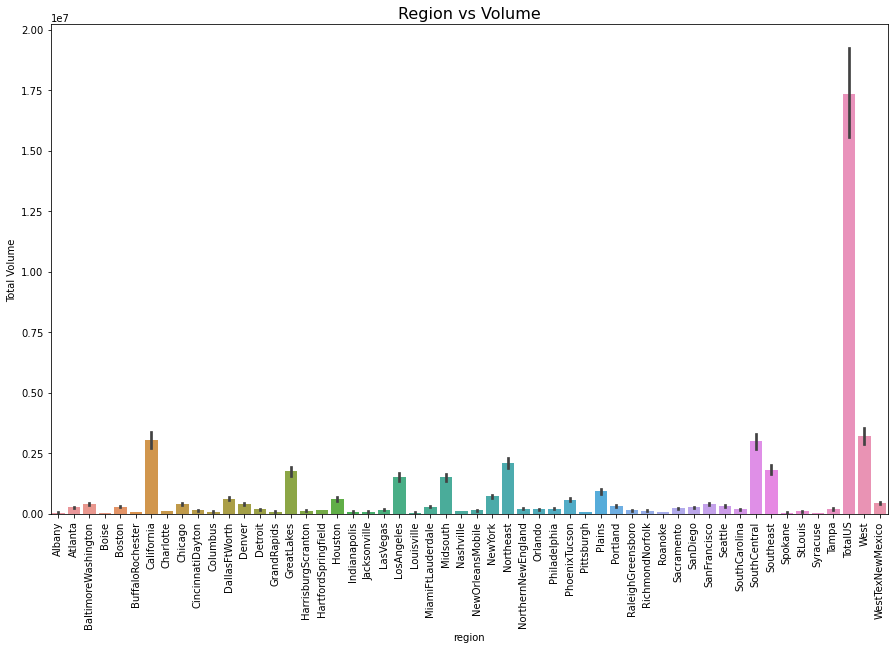

In [24]:
plt.figure(figsize=(15,9))
sns.barplot(x='region',y='Total Volume',data=df)
plt.xticks(Rotation=90,fontsize=10)
plt.title('Region vs Volume',fontsize=16)


# Observation:
- Highest volume of avacado was found in US, that could be happen because the  price of avacado is less there.
- California, West and SouthCentral regions have average good volume also as compare to other regions.

Text(0.5, 1.0, 'Region vs Volume')

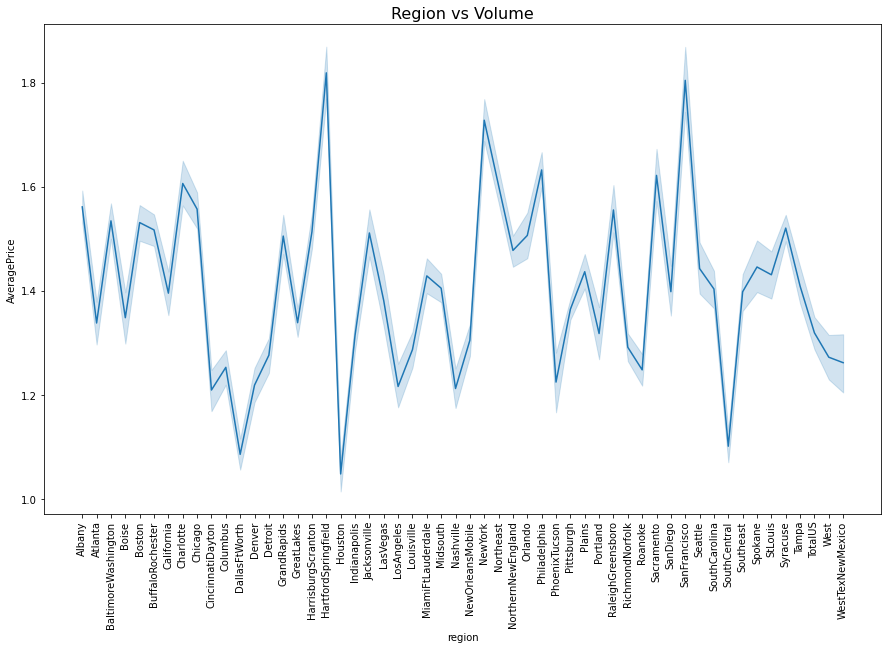

In [25]:
plt.figure(figsize=(15,9))
sns.lineplot(x='region',y='AveragePrice',data=df)
plt.xticks(Rotation=90,fontsize=10)
plt.title('Region vs Volume',fontsize=16)

## Observation:
- as we can see that US region has low prices of avacado that's why there sale is high.
- the minimum price of avacado is Houston region.

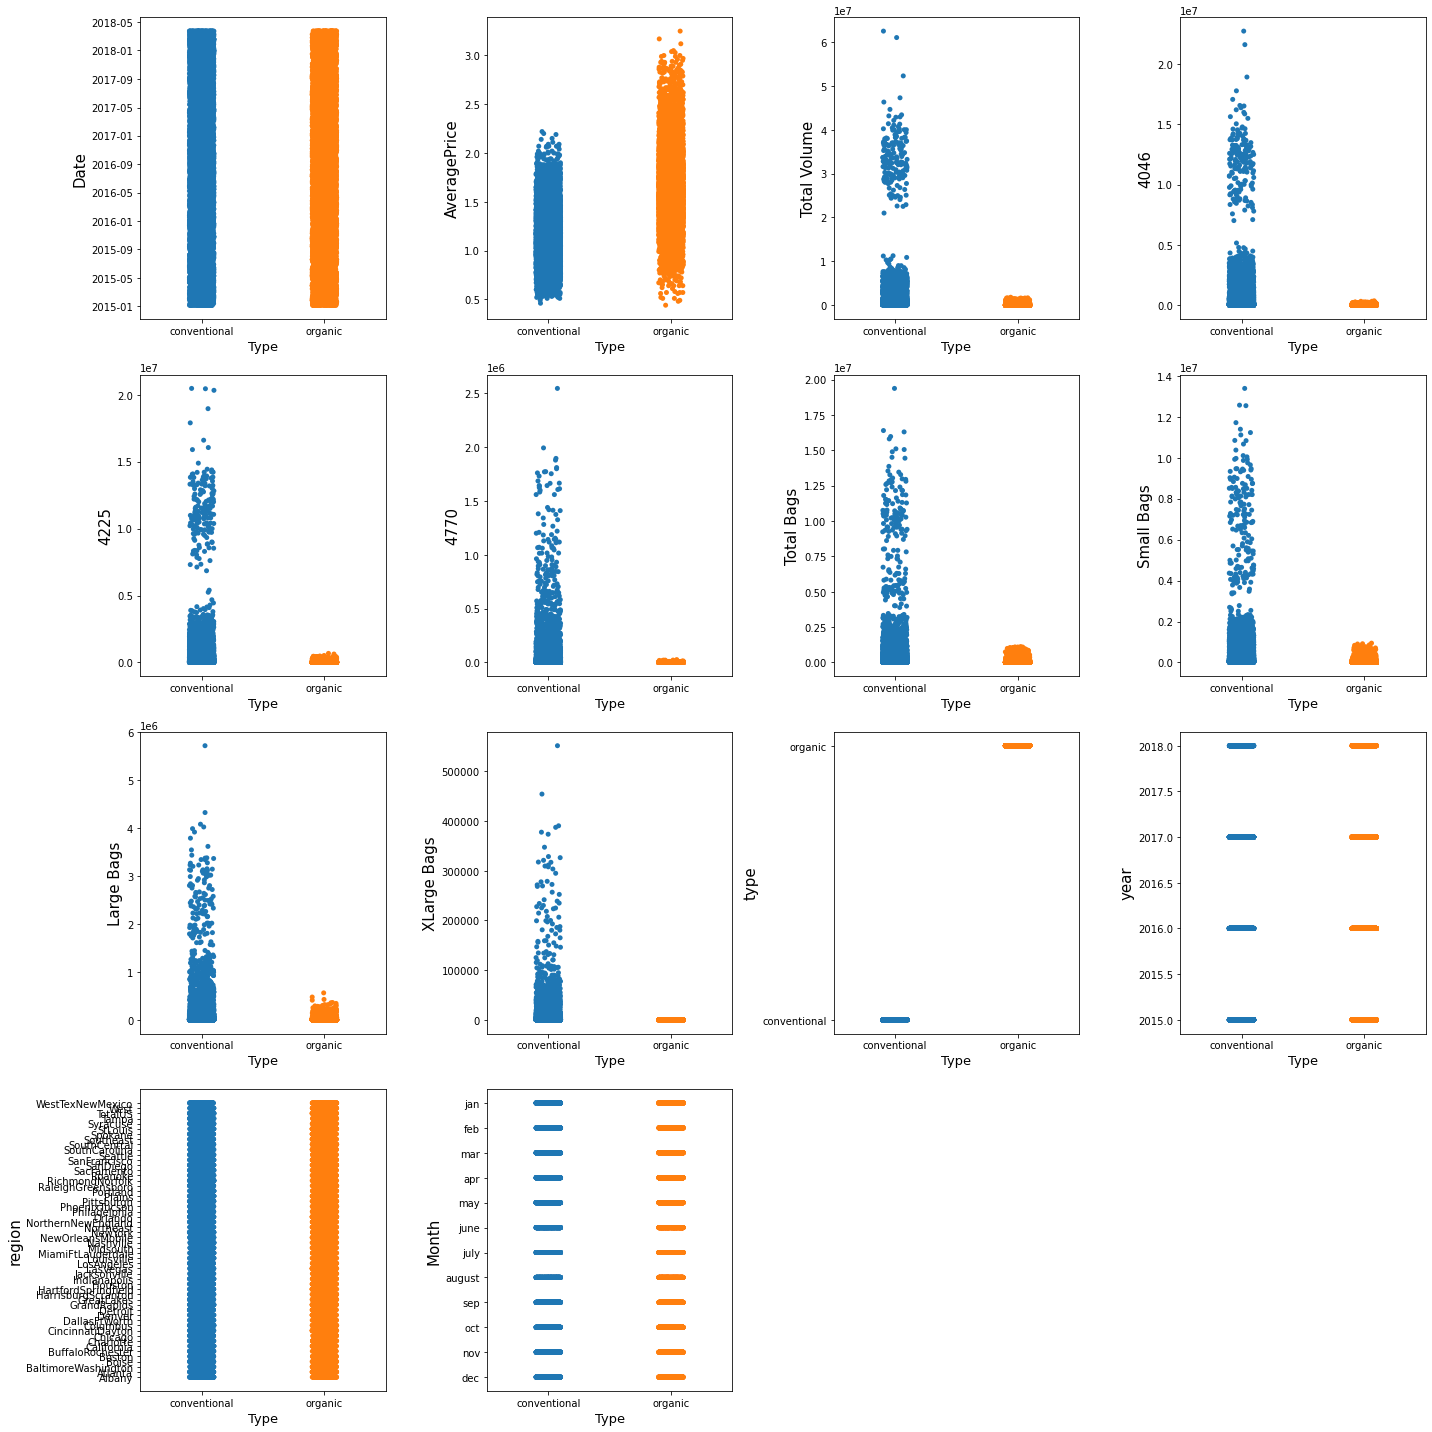

In [26]:
plt.figure(figsize=(20,20))
plotnumber=1
for i in df:
    if plotnumber<=100:
        ax=plt.subplot(4,4,plotnumber)
        sns.stripplot(x=df['type'],y=df[i])
        plt.xlabel('Type',fontsize=13)
        plt.ylabel(i,fontsize=15)
    plotnumber+=1
plt.tight_layout()

## Observation:
- TotalVolume, types of bags and PLU's all have high conventional type of avacados, there could be reason of low price of conventional type avacado.

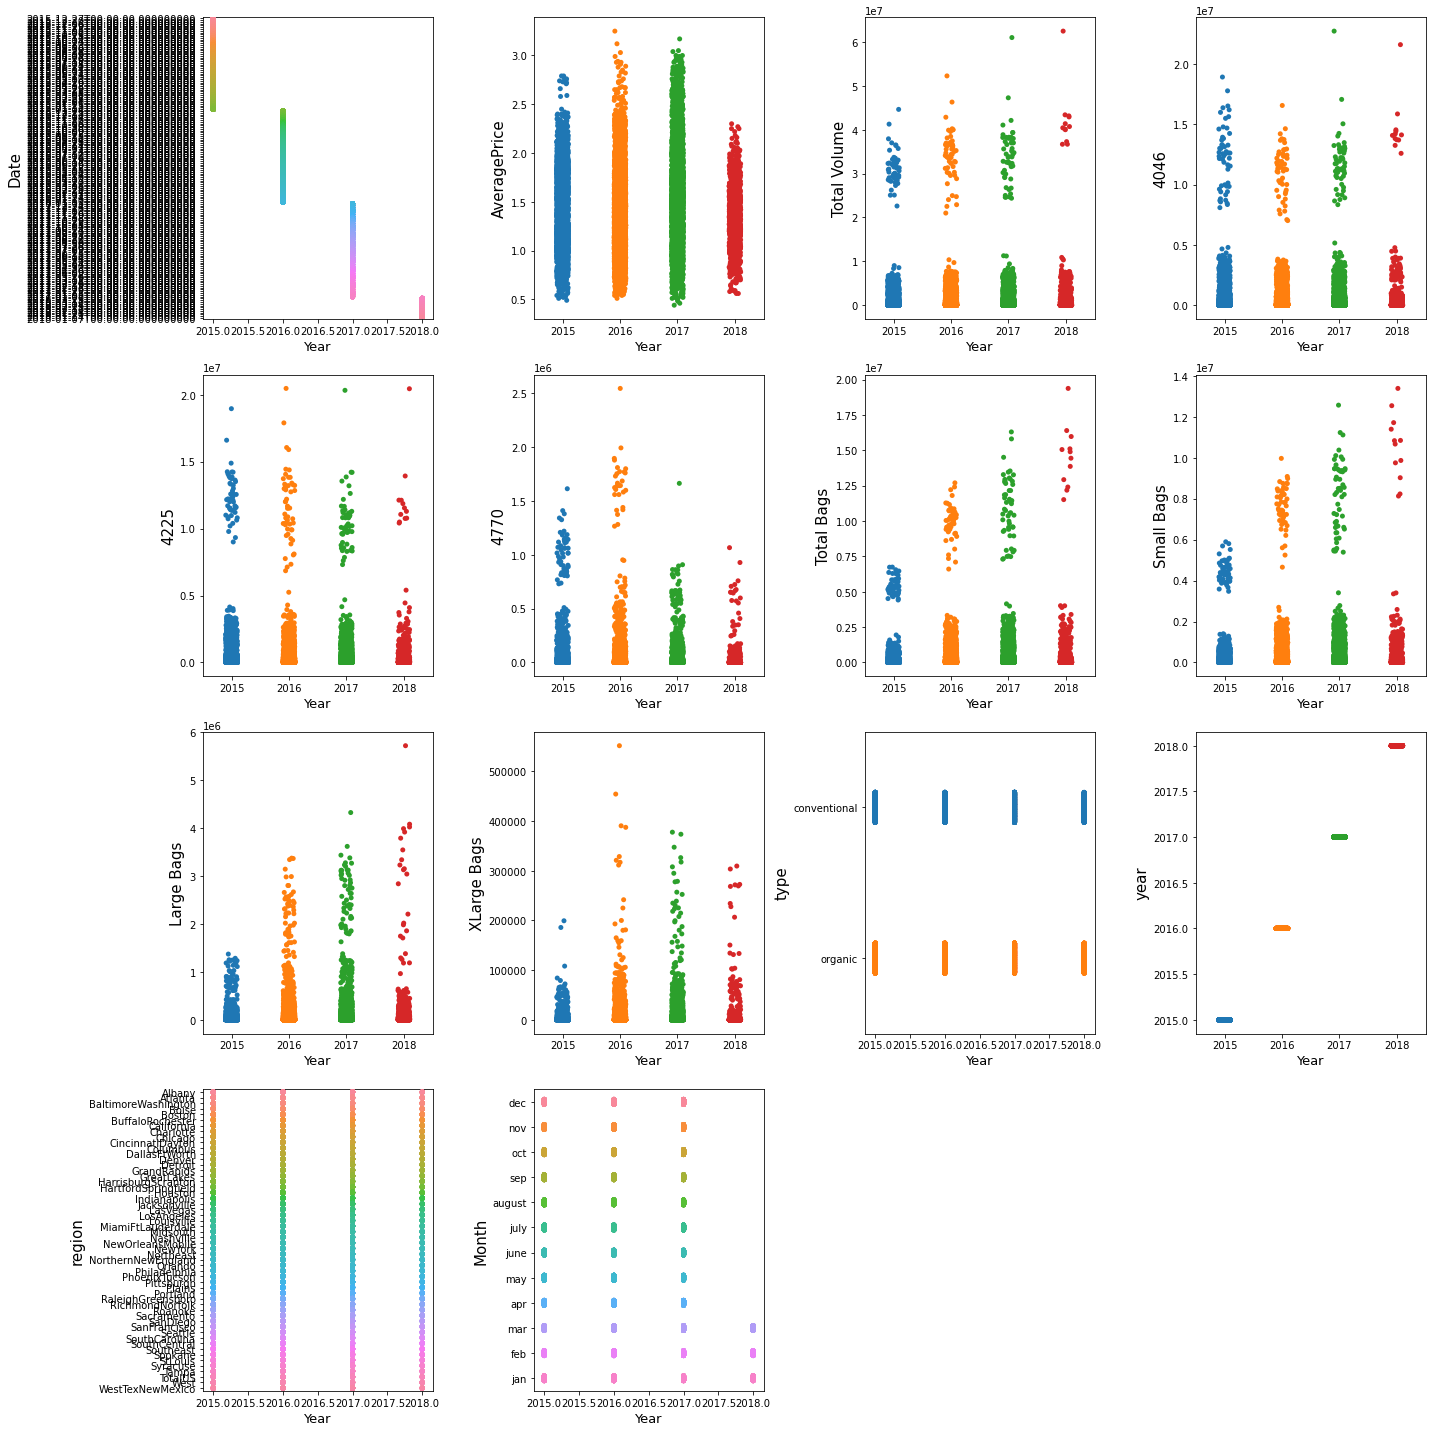

In [27]:
plt.figure(figsize=(20,20))
plotnumber=1
for i in df:
    if plotnumber<=100:
        ax=plt.subplot(4,4,plotnumber)
        sns.stripplot(x=df['year'],y=df[i])
        plt.xlabel('Year',fontsize=13)
        plt.ylabel(i,fontsize=15)
    plotnumber+=1
plt.tight_layout()

## Observation:
- Though data for the year 2018 is very low but we can see that TotalVolume, types of bags and PLU are highest for 2018 year. So keep that in mind we predict that as the time passed volums, bags and PLUs have increased.
- Also average price of avacado in 2018 is comparatively low, so that could be a reason for highest volum for this year.

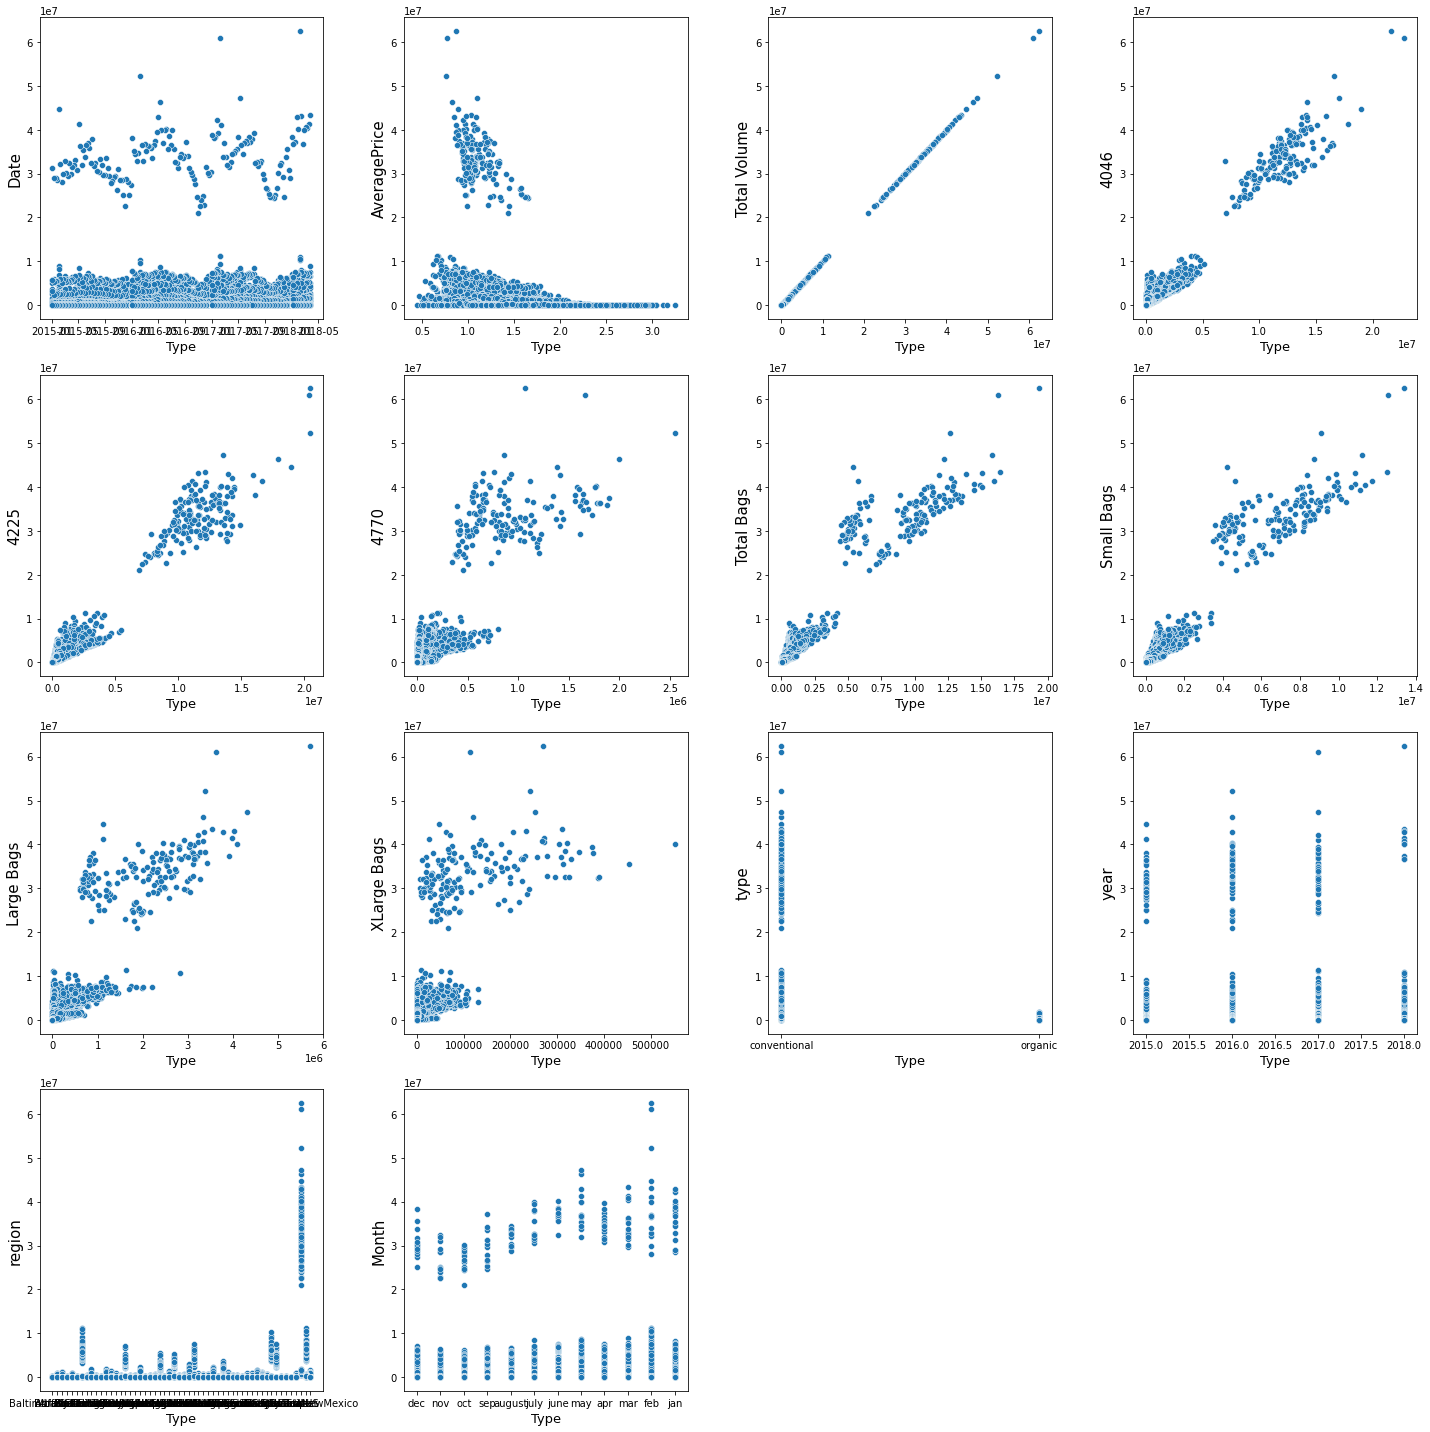

In [28]:
plt.figure(figsize=(20,20))
plotnumber=1
for i in df:
    if plotnumber<=100:
        ax=plt.subplot(4,4,plotnumber)
        sns.scatterplot(x=df[i],y=df['Total Volume'])
        plt.xlabel('Type',fontsize=13)
        plt.ylabel(i,fontsize=15)
    plotnumber+=1
plt.tight_layout()

## Observation:
- With the increase the total volume of avacado the quality of all bags are good.
- as total volume increasing the PLU codes are also increasing. It shows a positive trend or positive correlation.

## Checking the distribution of continuous data.


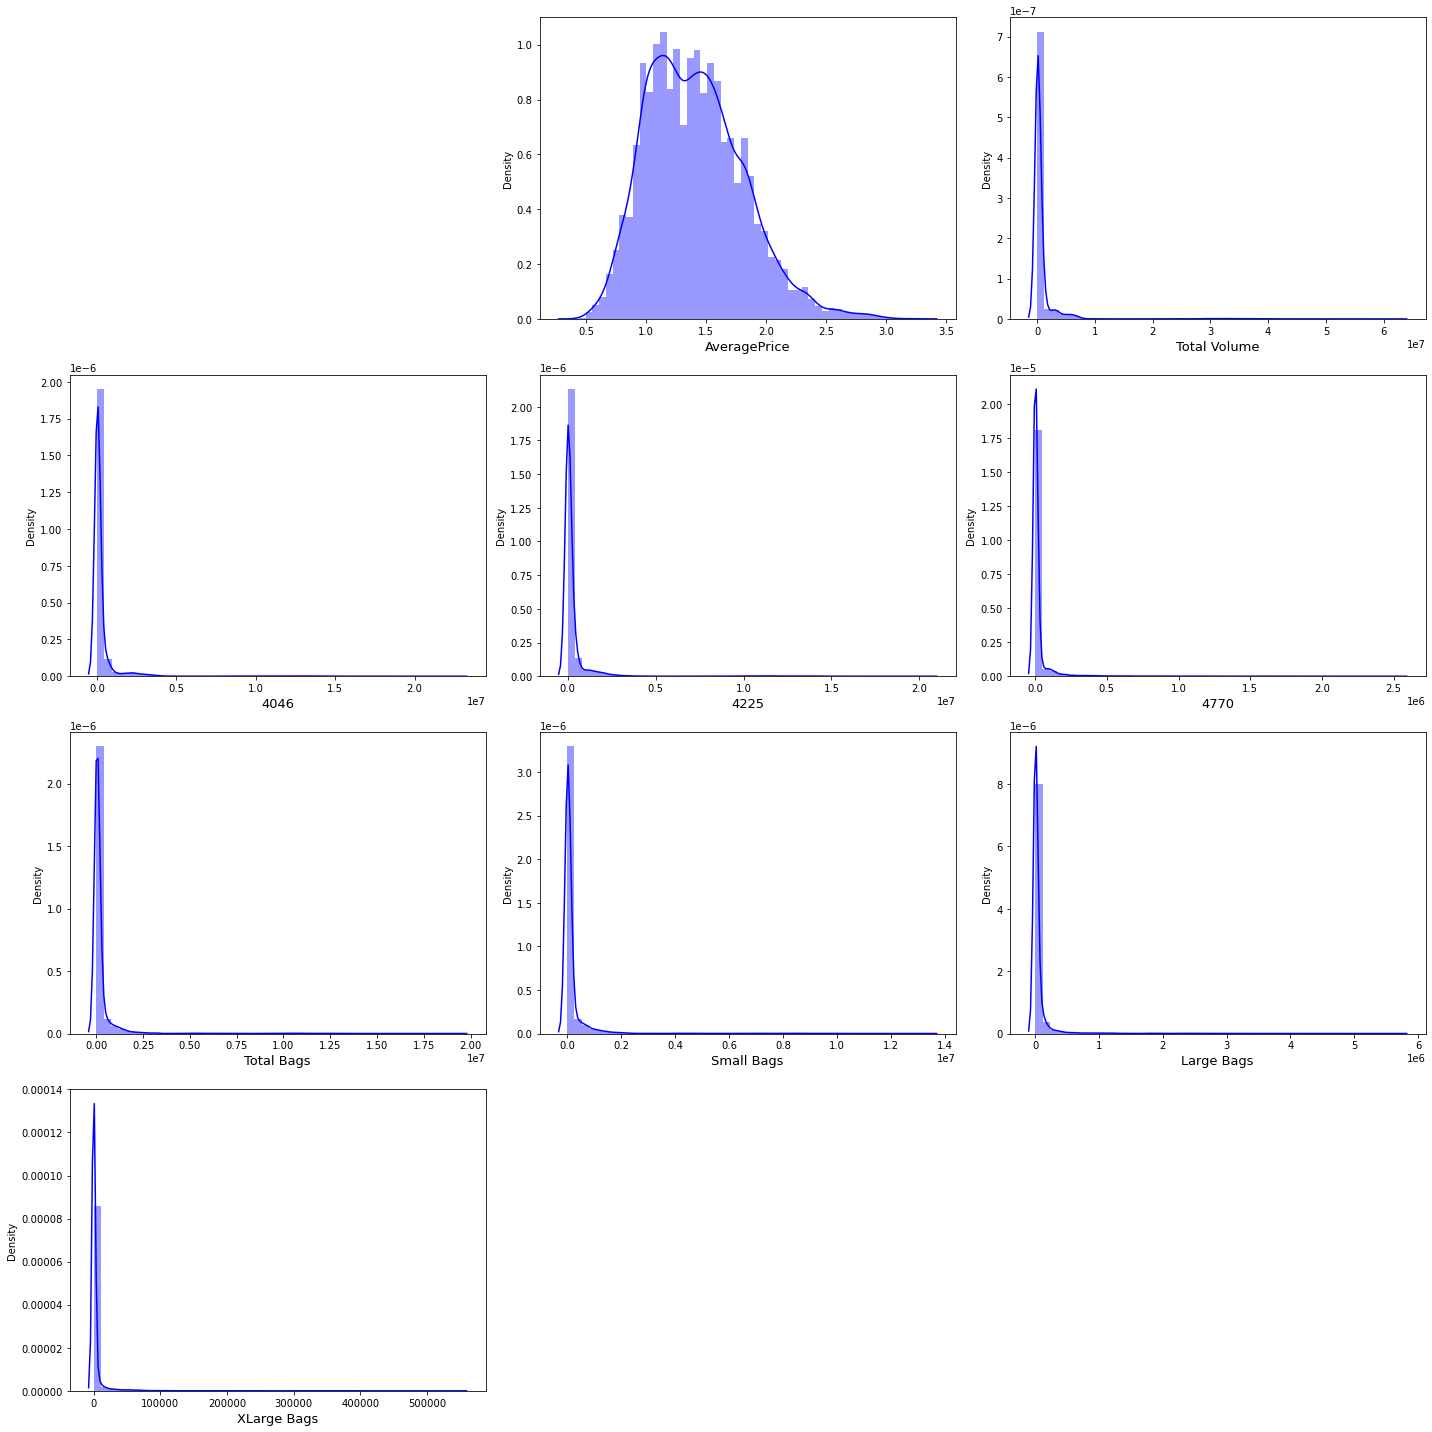

In [29]:
plt.figure(figsize=(20,20))
plotnumber=1
for i in df:
    if df[i].dtype=='float'or df[i].dtype=='int':
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[i],color='b')
        plt.xlabel(i,fontsize=13)
    plotnumber+=1
plt.tight_layout()

## Observation:
- The `average price` of avacado is little skewed from 2.5 to 3.5.
- Most of the `TotalVolume` data points falling below 1e^7 while it goes upto 6e^7. TotalVolume is highly skewed, we will take care of it later.
- Avacado wih `PLU4046`,`PLU4225`and `PLU447740` are intensed below 0.5, while it goes upto 2.8e^7. Data is highly skewed to the right, which needs to be taken care of ahead.
- `Total Bags` has most of its density about 0.25 e^7 but it goes upto the range of 2e^7. Which is also highly skewed to the right.
- `Small Bags`and `Large Bags`  have had most of its density near to 0.2 and 0.5 respectively. Data is highly skewed for both to right. We will take care of that later.
- `XLarge Bags` has most of its density form 0 to 100000 but it goes upto 580000 which is highly skewed to the right. With taken care of it we will go ahead.



In [30]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,dec
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,dec
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,dec
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,dec
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,nov
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,feb
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,jan
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,jan
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,jan


# Checking the Outliers:


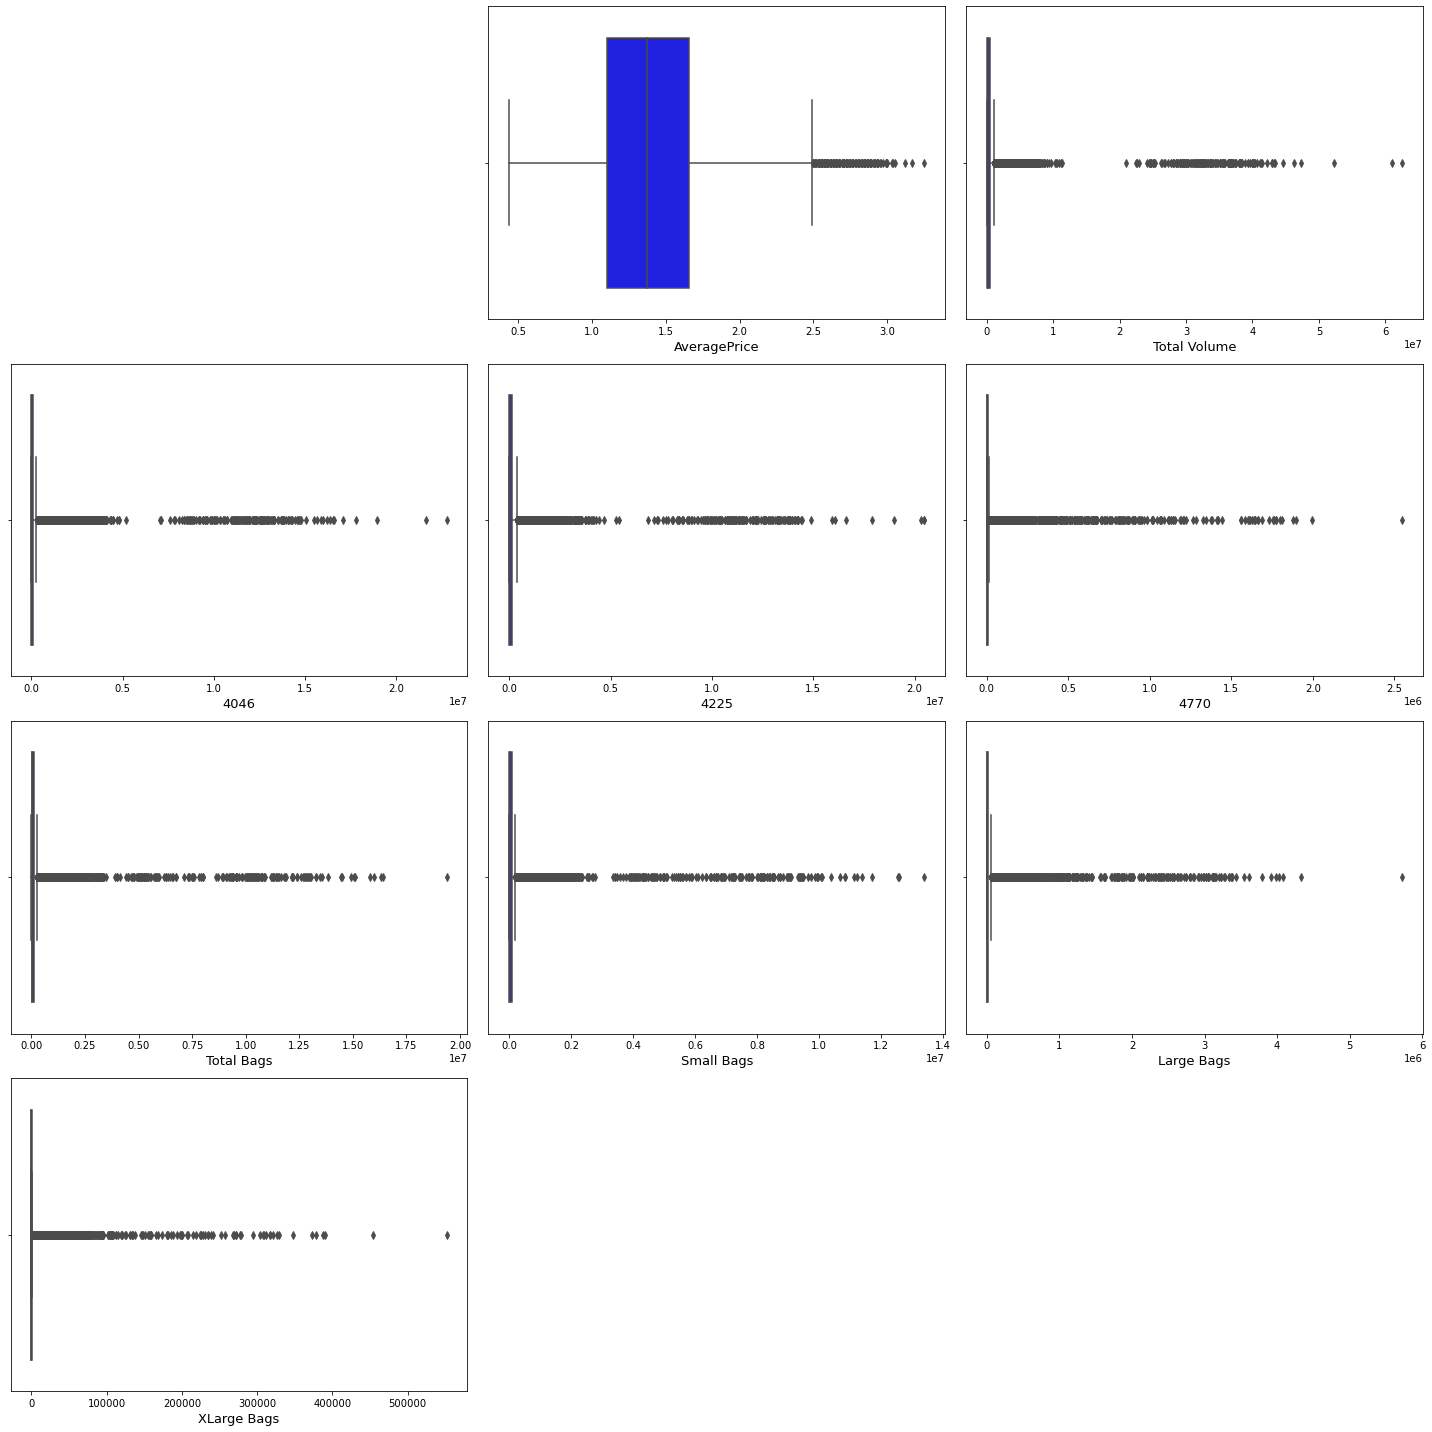

In [31]:
plt.figure(figsize=(20,20))
plotnumber=1
for i in df:
    if df[i].dtype=='float'or df[i].dtype=='int':
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(df[i],color='b')
        plt.xlabel(i,fontsize=13)
    plotnumber+=1
plt.tight_layout()

There are lot of outliers present in every feature. We have to remove those outliers otherwise our model may get overfit.

## Region vs Month

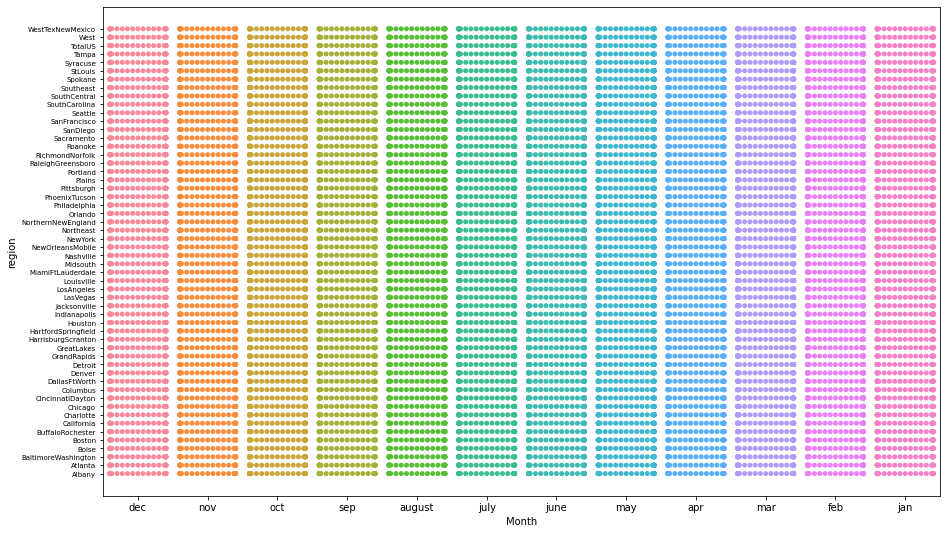

In [32]:
plt.figure(figsize=(15,9))
sns.swarmplot(x='Month',y='region',data=df)
plt.yticks(fontsize=7)
plt.show()

## Observation:-
The observation of avacado are collected from every region with respect to  every month. for each month avacados are collected from all the same region.

# Heatmap:

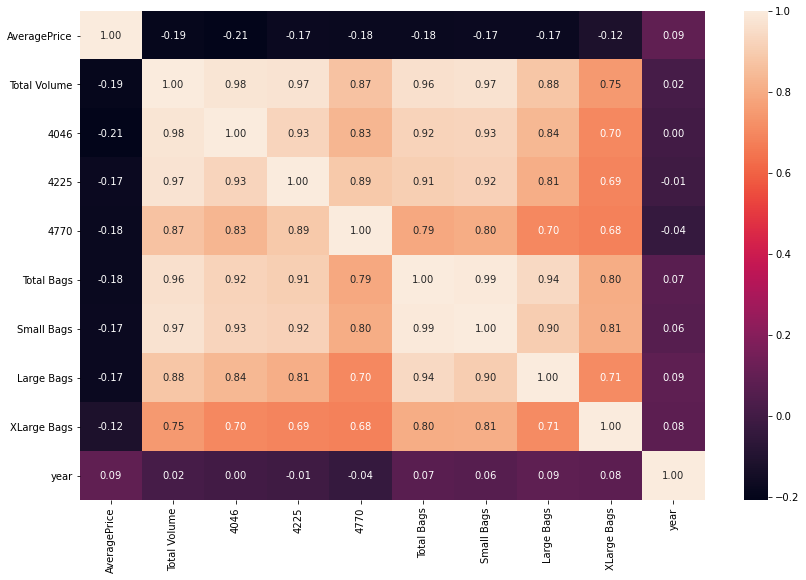

In [33]:
plt.figure(figsize=(14,9))
sns.heatmap(df.corr(),annot=True,annot_kws={'size':10},fmt='.2f')
plt.show()

## Observation of Heatmap:
- AveragePrice shows positive correlation only with  year column and negative correlation with rest of all feature.
- We can see that there are some features are showing highly correlation with each other. There is a possibility of  multicollinearity problem. But  we can not go with only evidence to drop them, we will check one more time.
- Total Bags and Small bags are 99% correlated. Which  is highly  correlated we will see it next.

<Figure size 1080x1080 with 0 Axes>

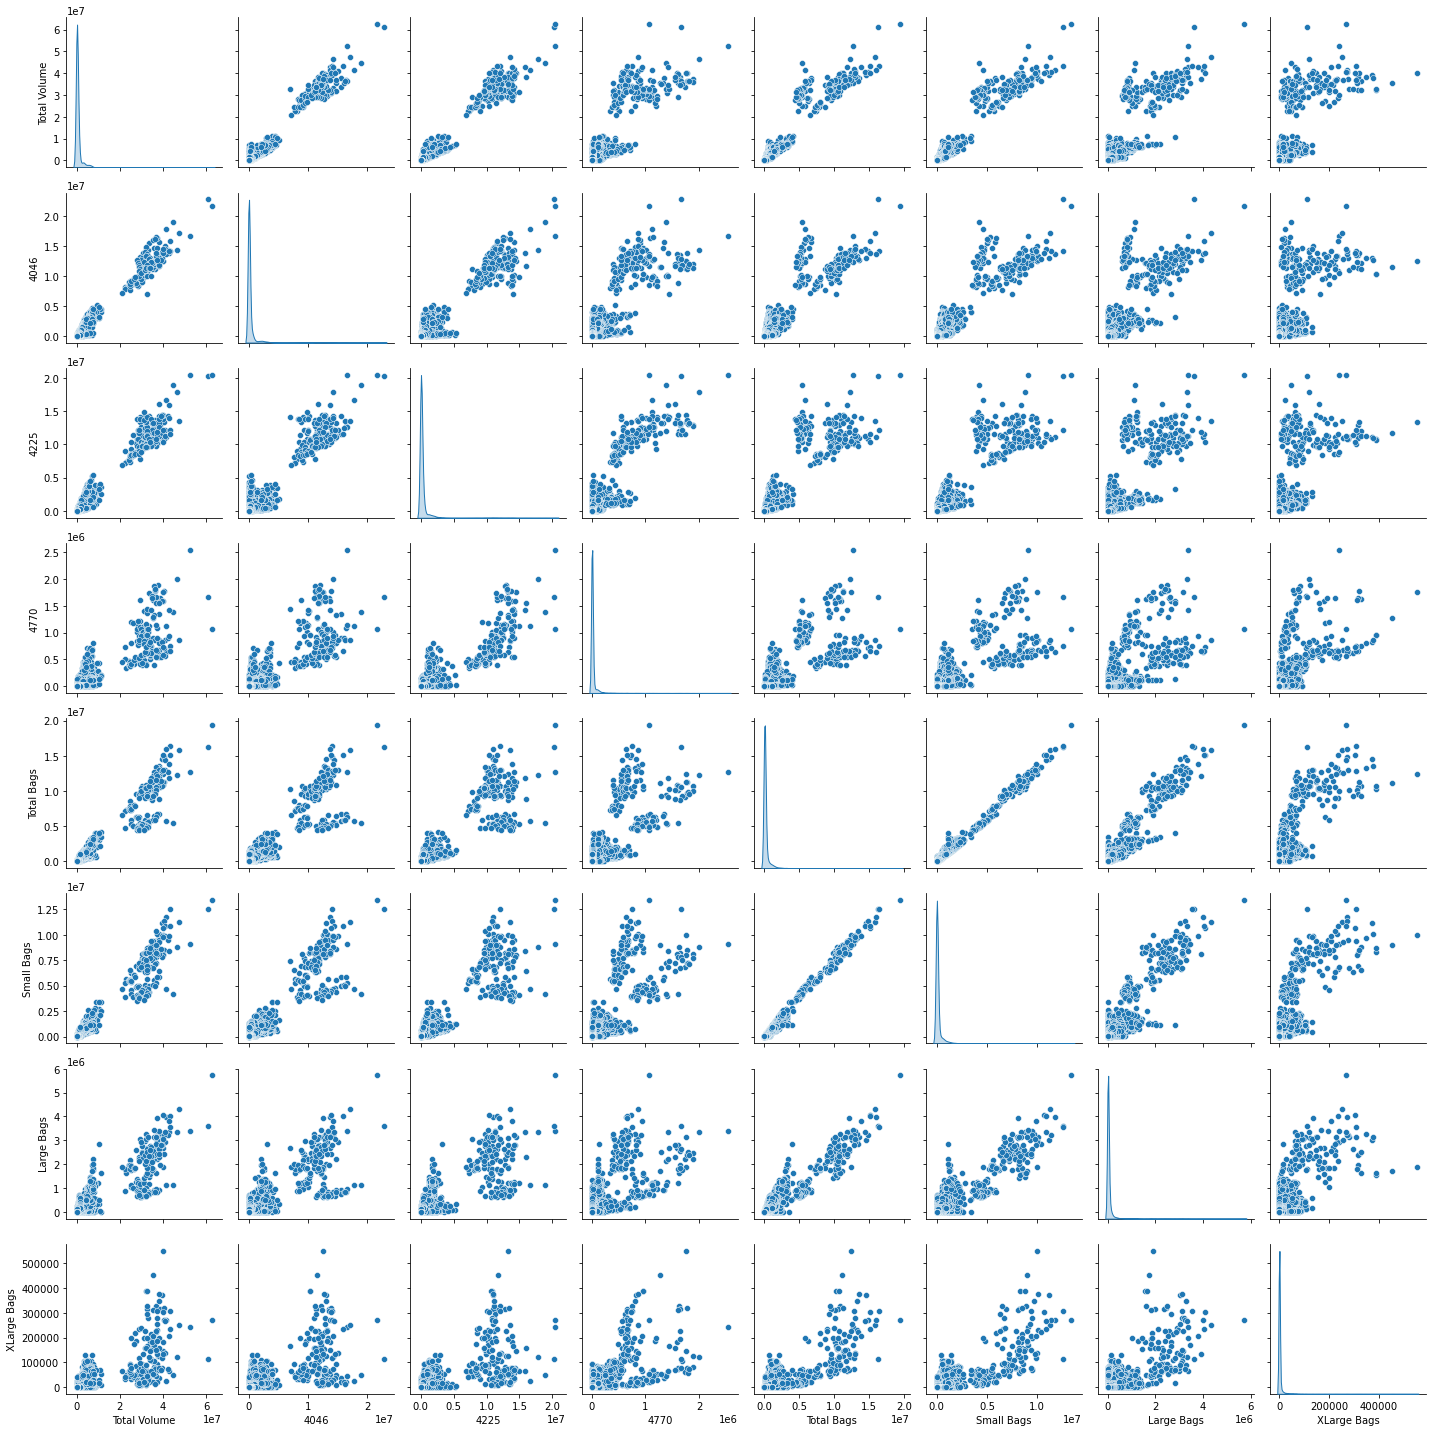

In [34]:
# pair plot
data=df[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]
plt.figure(figsize=(15,15))
sns.pairplot(data,diag_kind='kde')
plt.tight_layout()

## Observation:
- As we see in heatmap every independent feature are correlated to each  other.
- Total Volume is highly correlated with PLU 4225 and 4046 with small bags.
- We have to drop column in data preprocessing to get rid  of this multicollinearity problem.

# Data Pre-Processing:

### Encoding:
- We have 3 features are object data type so  we have encode them.
- year feature has 4 category we also replace those category into simple way.

In [35]:
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
Month                   object
dtype: object

In [36]:
df.year=df['year'].replace({2015:1,2016:2,2017:3,2018:4})

## DATE 
as we extract month for date column so now we can drop it.

In [37]:
df.drop('Date',axis=1,inplace=True)

## Encoding

we will encode object data so that our model can understand them.
- region
- type
- month


In [38]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,1,Albany,dec
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,1,Albany,dec
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,1,Albany,dec
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,1,Albany,dec
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,1,Albany,nov
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,4,WestTexNewMexico,feb
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,4,WestTexNewMexico,jan
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,4,WestTexNewMexico,jan
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,4,WestTexNewMexico,jan


In [39]:
## importing ordinal encoder
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

In [40]:
df['region']=oe.fit_transform(df['region'].values.reshape(-1,1))
df['Month']=oe.fit_transform(df['Month'].values.reshape(-1,1))
df['type']=oe.fit_transform(df['type'].values.reshape(-1,1))

In [45]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,1,0.0,2.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,1,0.0,2.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,1,0.0,2.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,1,0.0,2.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,1,0.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,4,53.0,3.0
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,4,53.0,4.0
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,4,53.0,4.0
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,4,53.0,4.0


Now we have converted all the column into numerical .

In [46]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
Month            0.027653
dtype: float64

- Except Average Price and Year, all the other columns are highly skewed.
- PLU 4770 and XLarge bags are most highly positive skewed.
- The accptance range of any feature from -0.5 to 0.5, but there are not any feature present who lie between this.

In [139]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,1,0.0,2.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,1,0.0,2.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,1,0.0,2.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,1,0.0,2.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,1,0.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,4,53.0,3.0
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,4,53.0,4.0
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,4,53.0,4.0
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,4,53.0,4.0


#### Z-Score for removing skewness.

In [140]:
from scipy.stats import zscore
import numpy as np

In [141]:
z=np.abs(zscore(df))
z.shape

(18249, 13)

In [142]:
threshold=3
df_new=df[(z<3).all(axis=1)]
print('Previous shape : ',df.shape)
print('Present Shape : ',df_new.shape)

Previous shape :  (18249, 13)
Present Shape :  (17651, 13)


## Data loss

In [143]:
loss_persent=((18249-17651)/18249)*100
print('The dataloss percent is : ', loss_persent)

The dataloss percent is :  3.276891884486821


The dataloss is only 3.27%, which is acceptable. Usually when the dataloss is more then 10% so then we do  not drop the data, because  data is everything for  us.

## Removing Skewness

In [144]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

In [145]:
## Checking the skewness of our  dataset
## splitting continous data type features
feature=df[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]
feature

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0
...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0
18245,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0
18246,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0
18247,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0


In [146]:
for  i in feature:
    if np.abs(df_new[i].skew())>0.5:
        df_new[i]=pt.fit_transform(df_new[i].values.reshape(-1,1))
        

As we removed skewness and outlier from our  dataset. Now  let's visualize once again and check the skewness and distribution.

## Checking again outlier:

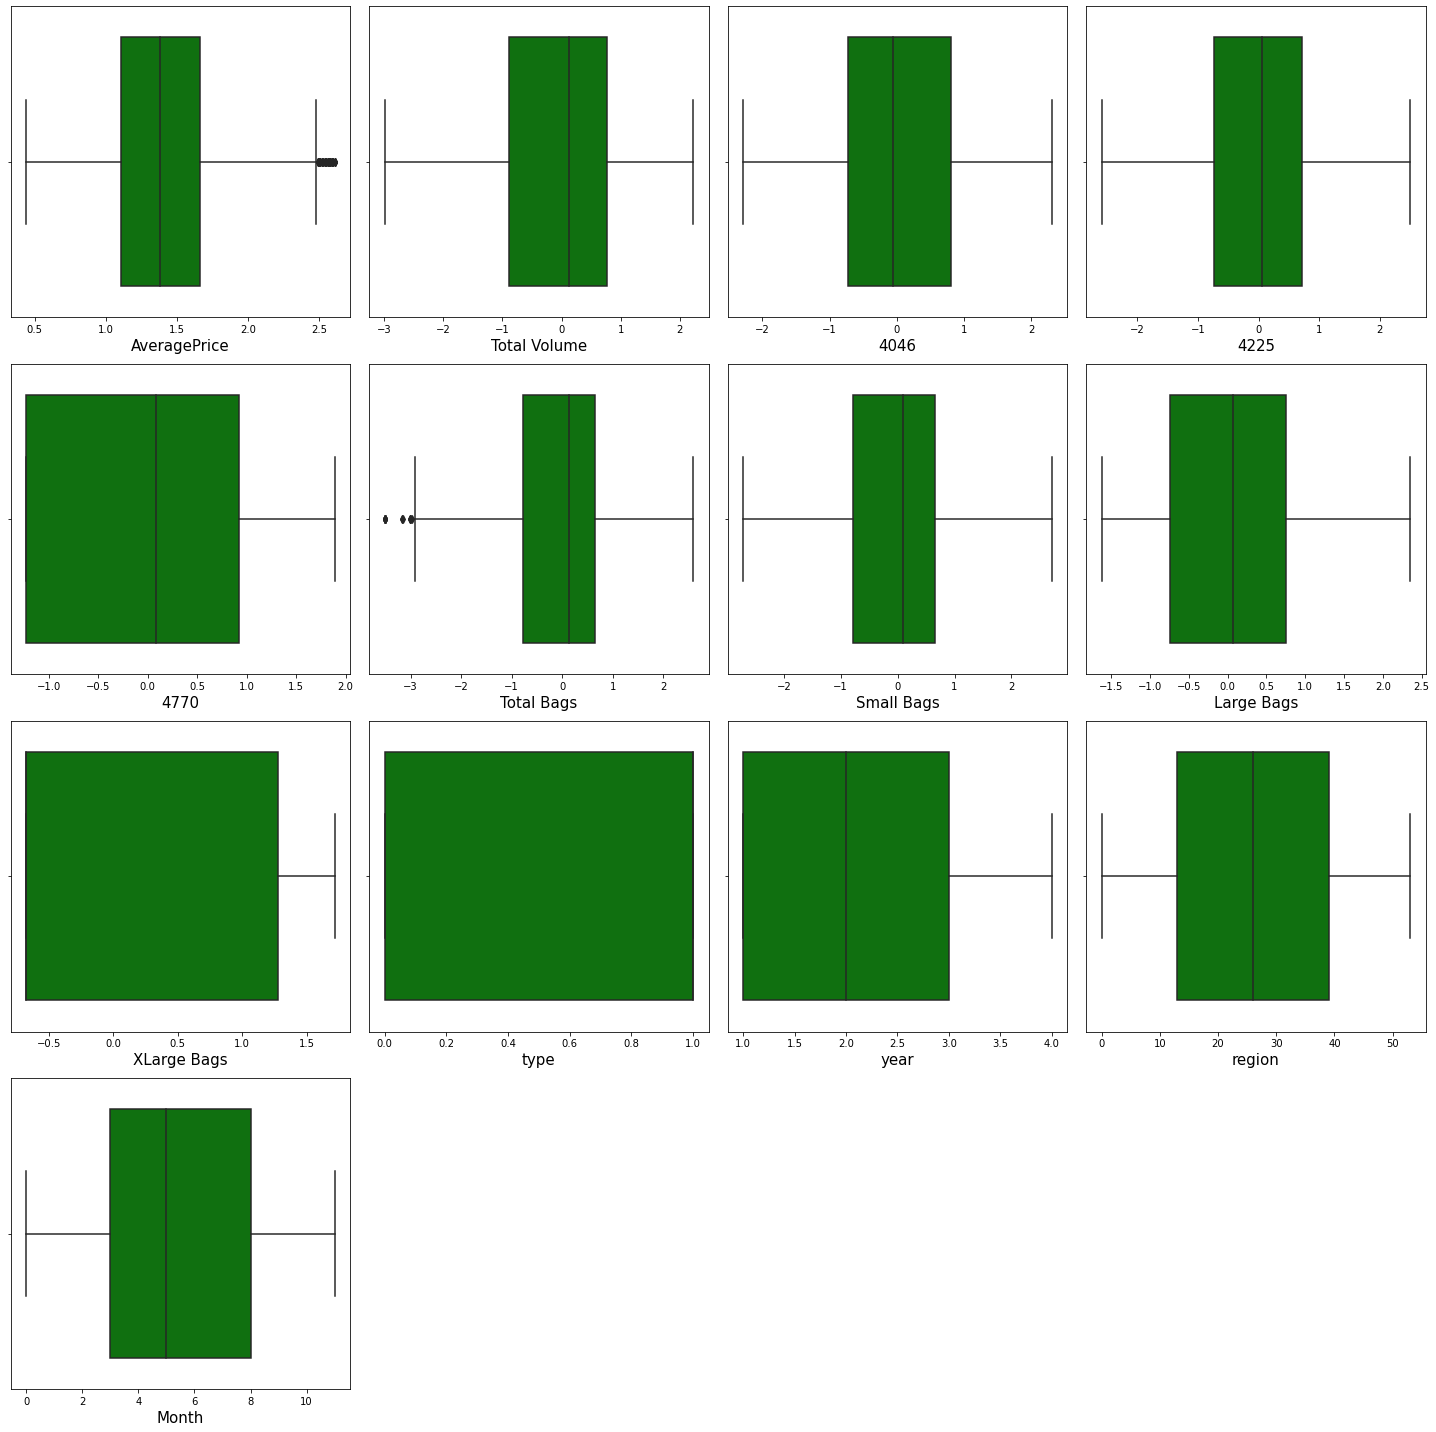

In [147]:
plt.figure(figsize=(20,20))
plotnumber=1
for i in df_new:
    if plotnumber<=100:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(df_new[i],color='g')
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.tight_layout()

## Observation:
As we can see that we have remove almost all the outliers from our dataset. But Total Bags column still has outliers, as we can see that those outliers are not much far from it's respective minimum value. As previously our dataset has large amount of outlier so that we will keep them. It will not much effect our model. 

## Checking Distribution:

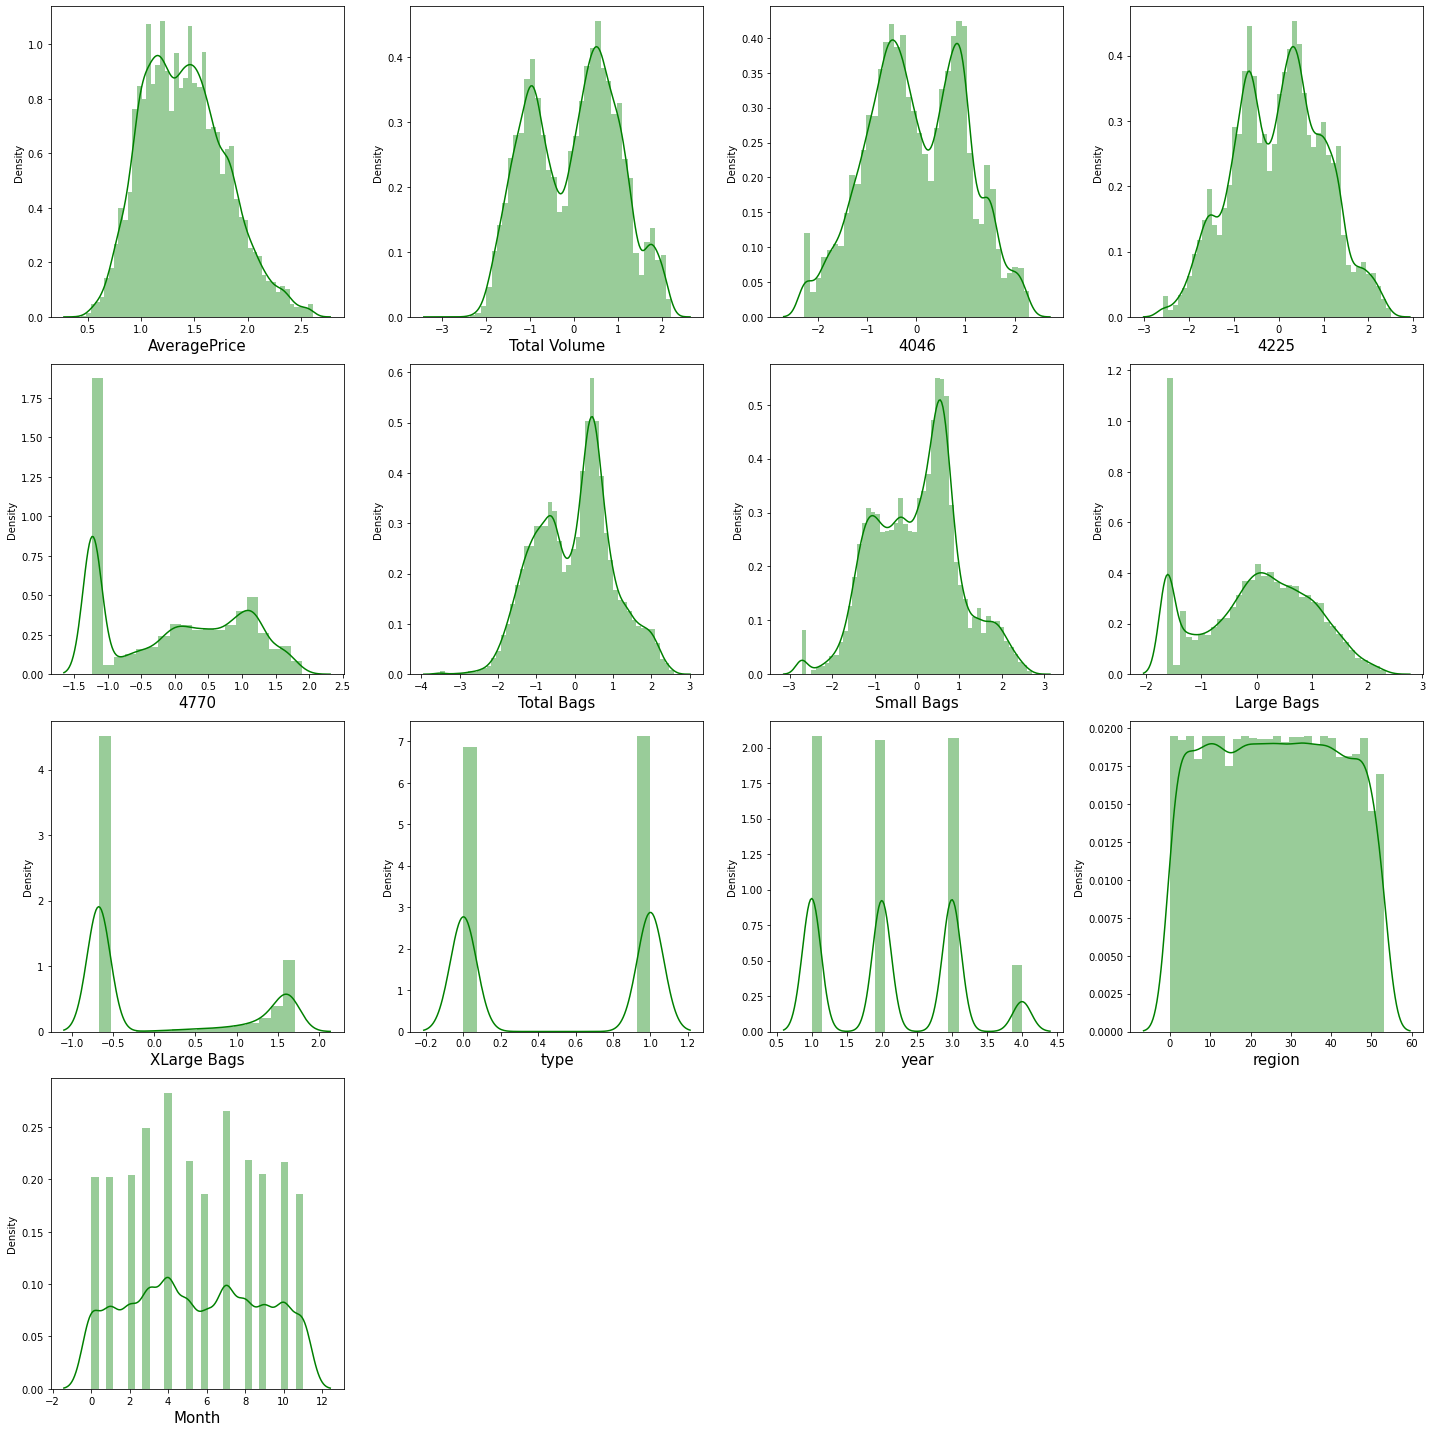

In [148]:
plt.figure(figsize=(20,20))
plotnumber=1
for i in df_new:
    if plotnumber<=100:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df_new[i],color='g')
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.tight_layout()

## Outcome from above graph
if we compare this distribution to previous distribution so we can find that skewness is almost negligible after using tranformation technique. Only XLarge Bags shows littlee bit skewness in graph but it is still reduced considerably.

## Checking skewness now:

In [149]:
df_new.skew()

AveragePrice    0.377432
Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.853758
type           -0.037741
year            0.229976
region          0.012798
Month           0.029197
dtype: float64

As we talked earlier XLarge Bags is still little skewed. But we have decrease it's skewness from 13.3 to 0.8. So it is acceptable.

## Heatmap:

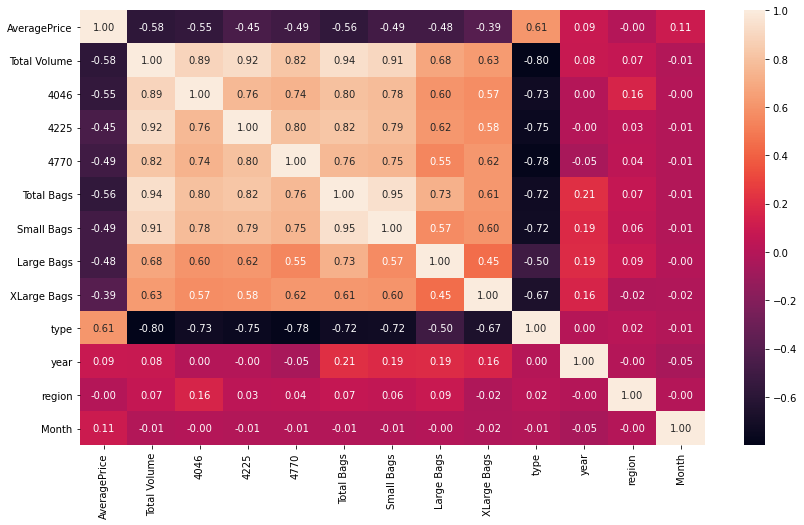

In [150]:
plt.figure(figsize=(14,8))
sns.heatmap(df_new.corr(),annot=True,annot_kws={'size':10},fmt='.2f')
plt.show()

# Conclusion:
- All the features, there correlation/coeficient is almost in the same range so we can't enable to get which is most contributing.
- Usually if any feature is more than 80% correlate with other feature then we have to delete one of them.
- Here `Total Volume` feature is 60% correlate with `Large Bags`, 91% correlated with `Small Bags`, 94% correlate with `Total Bags`, 82% correlate with `PLU4770` and 92% correlate with `PLU4225` and 89% correlated with correlate with `PLU4046` but `Total volume` is also 58% correlate with our `average price` which is highest corretion compare to these features.
- `Total Bags` and `Small Bags` is also 95% correlate with each other.
- So here we will use PCA for removing multicolinearity.

## Plotting all features with Total Volume

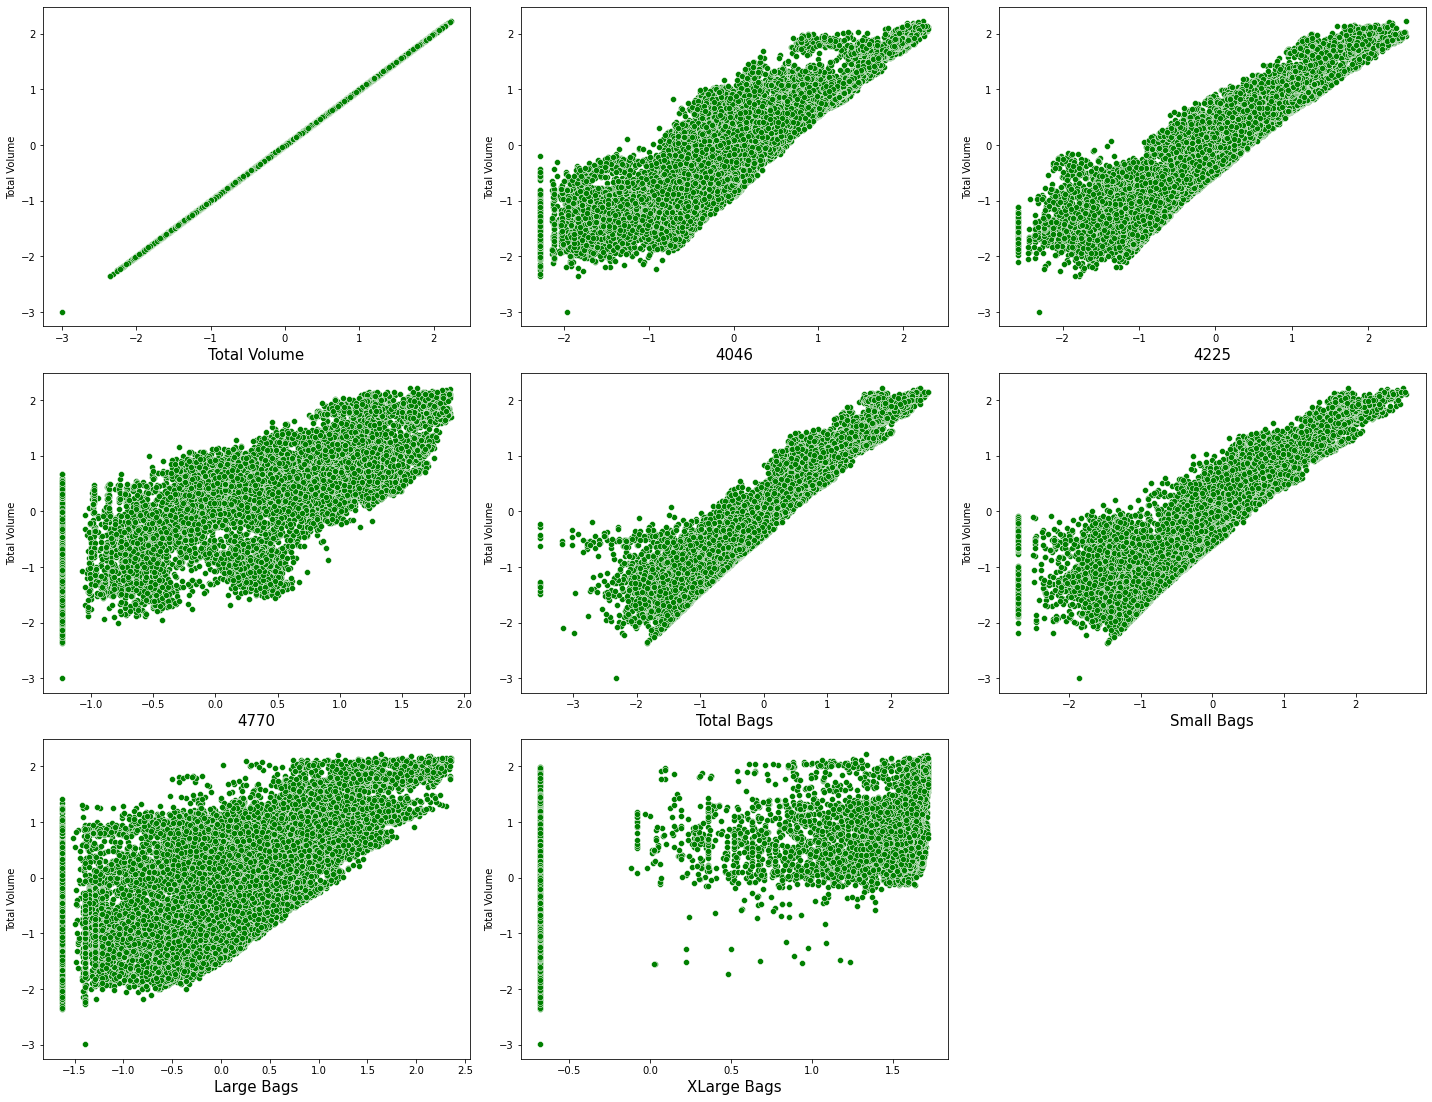

In [151]:
plt.figure(figsize=(20,20))
plotnumber=1
for i in feature:
    if plotnumber<=100:
        ax=plt.subplot(4,3,plotnumber)
        sns.scatterplot(x=df_new[i],y=df_new['Total Volume'],color='g')
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.tight_layout()

We can see the clear trend for all  feature.

## Plotting Small Bags vs Total Bags


<AxesSubplot:xlabel='Small Bags', ylabel='Total Bags'>

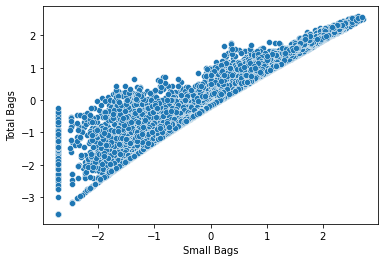

In [152]:
sns.scatterplot(x='Small Bags',y='Total Bags',data=df_new)

We also see the trend here.


In [153]:
## importing pca
from sklearn.decomposition import PCA
pca=PCA()

In [154]:
## splitting the dataset:
x=df_new.drop('AveragePrice',axis=1)
y=df_new['AveragePrice']

In [155]:
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919,0.0,1,0.0,2.0
1,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919,0.0,1,0.0,2.0
2,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919,0.0,1,0.0,2.0
3,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.677919,0.0,1,0.0,2.0
4,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.677919,0.0,1,0.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,-0.678214,-0.462066,-0.926028,-1.228986,-0.340422,-0.175753,-0.412401,-0.677919,1.0,4,53.0,3.0
18245,-0.771326,-0.618019,-0.670600,-1.228986,-0.509513,-0.331971,-0.484991,-0.677919,1.0,4,53.0,4.0
18246,-0.775274,-0.617966,-0.778893,0.445710,-0.503366,-0.313756,-0.950743,-0.677919,1.0,4,53.0,4.0
18247,-0.701797,-0.547011,-0.716371,0.445399,-0.434176,-0.250408,-0.916068,-0.677919,1.0,4,53.0,4.0


In [156]:
## Scaling the data 
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)
x_scaled


array([[0.55893336, 0.35498056, 0.57757163, ..., 0.        , 0.        ,
        0.18181818],
       [0.54510426, 0.32886287, 0.5614532 , ..., 0.        , 0.        ,
        0.18181818],
       [0.61275241, 0.33876453, 0.63618871, ..., 0.        , 0.        ,
        0.18181818],
       ...,
       [0.42481659, 0.36358503, 0.35516323, ..., 1.        , 1.        ,
        0.36363636],
       [0.43889538, 0.37905957, 0.36746539, ..., 1.        , 1.        ,
        0.36363636],
       [0.44548987, 0.41991611, 0.35265312, ..., 1.        , 1.        ,
        0.36363636]])

In [157]:
pca.fit_transform(x_scaled)

array([[ 0.04867377, -0.4604933 ,  0.26885599, ...,  0.04607314,
        -0.00359978,  0.01233485],
       [ 0.04440515, -0.45933952,  0.26740565, ...,  0.02179833,
        -0.00417007,  0.00817843],
       [ 0.09885424, -0.47494151,  0.27784829, ...,  0.09132166,
         0.0146188 ,  0.04074336],
       ...,
       [-0.52813084,  0.53265804,  0.15868413, ...,  0.00595752,
        -0.00158624, -0.00625666],
       [-0.51210103,  0.53364765,  0.16095319, ...,  0.00765673,
        -0.00060113, -0.00625929],
       [-0.54273452,  0.5425277 ,  0.1558999 , ...,  0.00475709,
         0.00320099, -0.01017091]])

## Plotting the scree plot

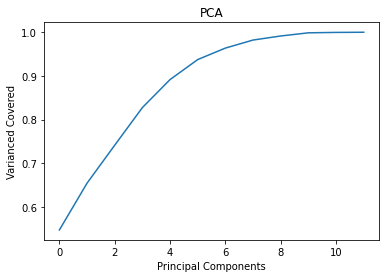

In [158]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Varianced Covered')
plt.title('PCA')
plt.show()


Around 8 Principal Components are able to explain >95% variance. It's safe to consider starting 8.

In [159]:
pca=PCA(n_components=8)
new_comp=pca.fit_transform(x_scaled)
x_comp=pd.DataFrame(new_comp,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
x_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.048674,-0.460493,0.268856,-0.645461,0.276700,0.304484,-0.122371,0.036730
1,0.044405,-0.459340,0.267406,-0.649258,0.274430,0.307421,-0.117767,0.011248
2,0.098854,-0.474942,0.277848,-0.634904,0.300243,0.271076,-0.070233,0.000097
3,0.064230,-0.467805,0.272885,-0.640728,0.283478,0.287724,-0.120966,0.004833
4,0.050230,-0.625939,-0.318317,-0.464767,0.281312,0.286998,-0.128041,-0.028108
...,...,...,...,...,...,...,...,...
17646,-0.681824,0.658050,0.205766,0.491029,0.005004,0.232848,0.022403,0.083008
17647,-0.698141,0.628041,0.120087,0.503557,-0.006353,0.247646,0.031526,0.060261
17648,-0.528131,0.532658,0.158684,0.507010,0.024160,0.201684,0.427124,-0.245626
17649,-0.512101,0.533648,0.160953,0.515362,0.034740,0.187829,0.427894,-0.228661


Now We check every thing. We are ready to building the model.

## Model building:

# Linear Regression:


In [160]:
## Importing the librabries.
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn. metrics import r2_score
lr=LinearRegression()

In [161]:
## finding the best random state
for  i in range(0,100):
    x_train,x_test,y_train,y_test=tts(x_comp,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At Random State {i}, the  training score is : {r2_score(y_train,pred_train)}")
    print(f"At Random State {i}, the testing score is : {r2_score(y_test,pred_test)}")
    print('The differece between training score and testing score is : ',r2_score(y_train,pred_train)-r2_score(y_test,pred_test))
    print('\n')

At Random State 0, the  training score is : 0.4639887825518173
At Random State 0, the testing score is : 0.45587811434975534
The differece between training score and testing score is :  0.008110668202061966


At Random State 1, the  training score is : 0.4642453247423898
At Random State 1, the testing score is : 0.45500341116654186
The differece between training score and testing score is :  0.009241913575847915


At Random State 2, the  training score is : 0.4660755882310951
At Random State 2, the testing score is : 0.44729765133442945
The differece between training score and testing score is :  0.018777936896665626


At Random State 3, the  training score is : 0.4594658355372653
At Random State 3, the testing score is : 0.47396908164037044
The differece between training score and testing score is :  -0.01450324610310516


At Random State 4, the  training score is : 0.46043885101995874
At Random State 4, the testing score is : 0.47030088323241315
The differece between training score a

Almost every random state, there is no big difference between training score and testing score. So that Random_state=69 selected.

In [206]:
def print_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print("\n=============Training Score==================")
        print(f"R2 Score is : {r2_score(y_train,y_pred)*100:.2f}%")
        
    elif train==False:
        from sklearn.metrics import mean_squared_error as MSE
        from sklearn.metrics import mean_absolute_error as MAE
        pred = clf.predict(x_test)
        print("\n================Testing Score==================")
        print(f"R2 Score is : {r2_score(y_test,pred)*100:.2f}%")
        print('\n\n')
        print('=================Model Evaluation======================')
        print(f"Mean Squared Error is : {MSE(y_test,pred)}")
        print(f"Mean Absolute Error is : {MAE(y_test,pred)}")
        print(f"SquareRoot of Mean Squared Error is : {np.sqrt(MSE(y_test,pred))}")
        

In [163]:
x_train,x_test,y_train,y_test=tts(x_comp,y,test_size=0.20,random_state=82)

In [164]:
lr.fit(x_train,y_train)
print_score(lr,x_train,x_test,y_train,y_test,train=True)

print_score(lr,x_train,x_test,y_train,y_test,train=False)


=============Training Score==================
R2 Score is : 45.81%

================Testing Score==================
R2 Score is : 47.90%



Mean Squared Error is : 0.07807830516657975
Mean Absolute Error is : 0.2216794152196723
SquareRoot of Mean Squared Error is : 0.27942495444498106


# Cross Validation:

In [165]:
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
train_score=r2_score(y_train,pred_train)
test_score=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for i in range(2,21):
    cv_score=cross_val_score(lr,x_comp,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the cv score is {cv_mean} and R2 score for testing score is {test_score}" )
    print('\n')

At cross fold 2 the cv score is -2.7960386361703673 and R2 score for testing score is 0.47896463351073604


At cross fold 3 the cv score is 0.14944991605164218 and R2 score for testing score is 0.47896463351073604


At cross fold 4 the cv score is 0.12166559814177016 and R2 score for testing score is 0.47896463351073604


At cross fold 5 the cv score is 0.19010986553085987 and R2 score for testing score is 0.47896463351073604


At cross fold 6 the cv score is 0.13653237492027595 and R2 score for testing score is 0.47896463351073604


At cross fold 7 the cv score is 0.1510478448386119 and R2 score for testing score is 0.47896463351073604


At cross fold 8 the cv score is 0.15124829252316885 and R2 score for testing score is 0.47896463351073604


At cross fold 9 the cv score is 0.16137210716316572 and R2 score for testing score is 0.47896463351073604


At cross fold 10 the cv score is 0.14265828346370663 and R2 score for testing score is 0.47896463351073604


At cross fold 11 the cv scor

# KNeighbors Regressor

In [136]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()

In [166]:
## finding the best random state
for  i in range(0,100):
    x_train,x_test,y_train,y_test=tts(x_comp,y,test_size=0.20,random_state=i)
    knn.fit(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    print(f"At Random State {i}, the  training score is : {r2_score(y_train,pred_train)}")
    print(f"At Random State {i}, the testing score is : {r2_score(y_test,pred_test)}")
    print('\n')

At Random State 0, the  training score is : 0.8615427238288794
At Random State 0, the testing score is : 0.7713945824404992


At Random State 1, the  training score is : 0.8621218858815474
At Random State 1, the testing score is : 0.7649157880797155


At Random State 2, the  training score is : 0.8630374680667267
At Random State 2, the testing score is : 0.7736315079555521


At Random State 3, the  training score is : 0.8634567364839995
At Random State 3, the testing score is : 0.7741927887048194


At Random State 4, the  training score is : 0.8612132450699519
At Random State 4, the testing score is : 0.7748346540094959


At Random State 5, the  training score is : 0.8608208625279803
At Random State 5, the testing score is : 0.7779969694126877


At Random State 6, the  training score is : 0.8612521357845846
At Random State 6, the testing score is : 0.7755428778570516


At Random State 7, the  training score is : 0.861373533767492
At Random State 7, the testing score is : 0.758515591790

Random State 68 selected.

In [167]:
x_train,x_test,y_train,y_test=tts(x_comp,y,test_size=0.20,random_state=68)
knn.fit(x_train,y_train)
print_score(knn,x_train,x_test,y_train,y_test,train=True)

print_score(knn,x_train,x_test,y_train,y_test,train=False)


=============Training Score==================
R2 Score is : 85.86%

================Testing Score==================
R2 Score is : 78.46%



Mean Squared Error is : 0.032771210421976775
Mean Absolute Error is : 0.13208949306145568
SquareRoot of Mean Squared Error is : 0.1810282033882477


# Cross validation.

In [168]:
pred_train=knn.predict(x_train)
pred_test=knn.predict(x_test)
train_score=r2_score(y_train,pred_train)
test_score=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for i in range(2,21):
    cv_score=cross_val_score(knn,x_comp,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the cv score is {cv_mean} and R2 score for testing score is {test_score}" )
    print('\n')

At cross fold 2 the cv score is -1.6933229631274291 and R2 score for testing score is 0.7845808293330594


At cross fold 3 the cv score is -0.2054962717522065 and R2 score for testing score is 0.7845808293330594


At cross fold 4 the cv score is -0.26450153131724485 and R2 score for testing score is 0.7845808293330594


At cross fold 5 the cv score is -0.0873966536989341 and R2 score for testing score is 0.7845808293330594


At cross fold 6 the cv score is -0.14931776777870304 and R2 score for testing score is 0.7845808293330594


At cross fold 7 the cv score is -0.12165483975731743 and R2 score for testing score is 0.7845808293330594


At cross fold 8 the cv score is -0.14978353373500775 and R2 score for testing score is 0.7845808293330594


At cross fold 9 the cv score is -0.11798666788710716 and R2 score for testing score is 0.7845808293330594


At cross fold 10 the cv score is -0.1558314808080588 and R2 score for testing score is 0.7845808293330594


At cross fold 11 the cv score i

# Random Forest Regressor

In [169]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [170]:
## finding the best random state
for  i in range(0,100):
    x_train,x_test,y_train,y_test=tts(x_comp,y,test_size=0.20,random_state=i)
    dt.fit(x_train,y_train)
    pred_train=dt.predict(x_train)
    pred_test=dt.predict(x_test)
    print(f"At Random State {i}, the  training score is : {r2_score(y_train,pred_train)}")
    print(f"At Random State {i}, the testing score is : {r2_score(y_test,pred_test)}")
    print('\n')

At Random State 0, the  training score is : 1.0
At Random State 0, the testing score is : 0.576687493617899


At Random State 1, the  training score is : 1.0
At Random State 1, the testing score is : 0.5652969885679104


At Random State 2, the  training score is : 1.0
At Random State 2, the testing score is : 0.5920139129918326


At Random State 3, the  training score is : 1.0
At Random State 3, the testing score is : 0.6025734978331959


At Random State 4, the  training score is : 1.0
At Random State 4, the testing score is : 0.5680810750549801


At Random State 5, the  training score is : 1.0
At Random State 5, the testing score is : 0.5500286377399128


At Random State 6, the  training score is : 1.0
At Random State 6, the testing score is : 0.5922936964118573


At Random State 7, the  training score is : 1.0
At Random State 7, the testing score is : 0.5756254365148803


At Random State 8, the  training score is : 1.0
At Random State 8, the testing score is : 0.5763444264491321


At

training score is 100% but At Random State 3 testing score  is 60%.

In [171]:
x_train,x_test,y_train,y_test=tts(x_comp,y,test_size=0.20,random_state=3)
dt.fit(x_train,y_train)
print_score(dt,x_train,x_test,y_train,y_test,train=True)

print_score(dt,x_train,x_test,y_train,y_test,train=False)


=============Training Score==================
R2 Score is : 100.00%

================Testing Score==================
R2 Score is : 60.44%



Mean Squared Error is : 0.05846182384593599
Mean Absolute Error is : 0.1641829510053809
SquareRoot of Mean Squared Error is : 0.24178880008374248


# Cross Validation:

In [173]:
pred_train=dt.predict(x_train)
pred_test=dt.predict(x_test)
train_score=r2_score(y_train,pred_train)
test_score=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for i in range(2,21):
    cv_score=cross_val_score(dt,x_comp,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the cv score is {cv_mean} and R2 score for testing score is {test_score}" )
    print('\n')

At cross fold 2 the cv score is -4.6927796402952655 and R2 score for testing score is 0.6043744553758406


At cross fold 3 the cv score is -0.9594870813924273 and R2 score for testing score is 0.6043744553758406


At cross fold 4 the cv score is -1.1761631436748634 and R2 score for testing score is 0.6043744553758406


At cross fold 5 the cv score is -0.7204065373820603 and R2 score for testing score is 0.6043744553758406


At cross fold 6 the cv score is -0.811139800682278 and R2 score for testing score is 0.6043744553758406


At cross fold 7 the cv score is -0.6916978711064273 and R2 score for testing score is 0.6043744553758406


At cross fold 8 the cv score is -0.8140438702262695 and R2 score for testing score is 0.6043744553758406


At cross fold 9 the cv score is -0.7296139571551681 and R2 score for testing score is 0.6043744553758406


At cross fold 10 the cv score is -0.8464192982917004 and R2 score for testing score is 0.6043744553758406


At cross fold 11 the cv score is -0.8

# SVM

In [174]:
from sklearn.svm import SVR
svr=SVR()

In [177]:
## finding the best random state
for  i in range(0,100):
    x_train,x_test,y_train,y_test=tts(x_comp,y,test_size=0.20,random_state=i)
    svr.fit(x_train,y_train)
    pred_train=svr.predict(x_train)
    pred_test=svr.predict(x_test)
    if round((r2_score(y_train,pred_train))*100,1)-round((r2_score(y_test,pred_test))*100,1)<2:
        print(f"At Random State {i}, the  training score is : {r2_score(y_train,pred_train)}")
        print(f"At Random State {i}, the testing score is : {r2_score(y_test,pred_test)}")
        print('\n')

At Random State 3, the  training score is : 0.6432551804294702
At Random State 3, the testing score is : 0.6546675062442261


At Random State 4, the  training score is : 0.6452795339593196
At Random State 4, the testing score is : 0.6441379039802044


At Random State 5, the  training score is : 0.6445760442203944
At Random State 5, the testing score is : 0.6402686324036936


At Random State 6, the  training score is : 0.646555049213572
At Random State 6, the testing score is : 0.6411538365715375


At Random State 7, the  training score is : 0.6488038842678775
At Random State 7, the testing score is : 0.631846526580274


At Random State 8, the  training score is : 0.6462465752738771
At Random State 8, the testing score is : 0.6389362975374941


At Random State 9, the  training score is : 0.646021047423109
At Random State 9, the testing score is : 0.6421142091570946


At Random State 11, the  training score is : 0.6470681339384587
At Random State 11, the testing score is : 0.636014056237

Random State=31 selected

In [179]:
x_train,x_test,y_train,y_test=tts(x_comp,y,test_size=0.20,random_state=31)
svr.fit(x_train,y_train)
print_score(svr,x_train,x_test,y_train,y_test,train=True)

print_score(svr,x_train,x_test,y_train,y_test,train=False)


=============Training Score==================
R2 Score is : 64.46%

================Testing Score==================
R2 Score is : 64.33%



Mean Squared Error is : 0.05347870634746035
Mean Absolute Error is : 0.17534277773560883
SquareRoot of Mean Squared Error is : 0.23125463529940402


# Cross Validation:

In [181]:
pred_train=svr.predict(x_train)
pred_test=svr.predict(x_test)
train_score=r2_score(y_train,pred_train)
test_score=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for i in range(2,11):
    cv_score=cross_val_score(svr,x_comp,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the cv score is {cv_mean} and R2 score for testing score is {test_score}" )
    print('\n')

At cross fold 2 the cv score is -2.0564298566137875 and R2 score for testing score is 0.6433396289027915


At cross fold 3 the cv score is -0.5067050133568199 and R2 score for testing score is 0.6433396289027915


At cross fold 4 the cv score is -0.3488517464951764 and R2 score for testing score is 0.6433396289027915


At cross fold 5 the cv score is -0.44308881449636156 and R2 score for testing score is 0.6433396289027915


At cross fold 6 the cv score is -0.13098386644374957 and R2 score for testing score is 0.6433396289027915


At cross fold 7 the cv score is -0.04499701754519995 and R2 score for testing score is 0.6433396289027915


At cross fold 8 the cv score is 0.02921104007390736 and R2 score for testing score is 0.6433396289027915


At cross fold 9 the cv score is 0.06219637525985321 and R2 score for testing score is 0.6433396289027915


At cross fold 10 the cv score is -0.04261817925623881 and R2 score for testing score is 0.6433396289027915




# Ensemble Techniques

In [182]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor,GradientBoostingRegressor
rf=RandomForestRegressor()
abr=AdaBoostRegressor()
gbr=GradientBoostingRegressor()


In [187]:
## finding the best random state
for  i in range(0,50):
    x_train,x_test,y_train,y_test=tts(x_comp,y,test_size=0.20,random_state=i)
    rf.fit(x_train,y_train)
    pred_train=rf.predict(x_train)
    pred_test=rf.predict(x_test)
    print(f"At Random State {i}, the  training score is : {r2_score(y_train,pred_train)}")
    print(f"At Random State {i}, the testing score is : {r2_score(y_test,pred_test)}")
    print('\n')

At Random State 0, the  training score is : 0.9705255866699941
At Random State 0, the testing score is : 0.8004699481869944


At Random State 1, the  training score is : 0.9709138472339048
At Random State 1, the testing score is : 0.7849307218118189


At Random State 2, the  training score is : 0.9712787537237354
At Random State 2, the testing score is : 0.7918515335230927


At Random State 3, the  training score is : 0.9708024948591149
At Random State 3, the testing score is : 0.8060114255123185


At Random State 4, the  training score is : 0.970932753662059
At Random State 4, the testing score is : 0.7977169150903071


At Random State 5, the  training score is : 0.9705648510359214
At Random State 5, the testing score is : 0.799571110946055


At Random State 6, the  training score is : 0.9710068904781133
At Random State 6, the testing score is : 0.7955088104965417


At Random State 7, the  training score is : 0.9710347582577133
At Random State 7, the testing score is : 0.7799865309578

Randon state= 0 is selected

In [188]:
print('RandomForestRegressor Score')
x_train,x_test,y_train,y_test=tts(x_comp,y,test_size=0.20,random_state=0)
rf.fit(x_train,y_train)
print_score(rf,x_train,x_test,y_train,y_test,train=True)

print_score(rf,x_train,x_test,y_train,y_test,train=False)

RandomForestRegressor Score

=============Training Score==================
R2 Score is : 97.06%

================Testing Score==================
R2 Score is : 80.04%



Mean Squared Error is : 0.029916996117247234
Mean Absolute Error is : 0.12629399603511754
SquareRoot of Mean Squared Error is : 0.17296530321786285


In [189]:
print( 'AdaBoostRegressor Score')
x_train,x_test,y_train,y_test=tts(x_comp,y,test_size=0.20,random_state=0)
abr.fit(x_train,y_train)
print_score(abr,x_train,x_test,y_train,y_test,train=True)

print_score(abr,x_train,x_test,y_train,y_test,train=False)

AdaBoostRegressor Score

=============Training Score==================
R2 Score is : 49.10%

================Testing Score==================
R2 Score is : 48.68%



Mean Squared Error is : 0.0769050852995699
Mean Absolute Error is : 0.22125647407006785
SquareRoot of Mean Squared Error is : 0.2773176613552947


In [190]:
print('GradientBoostingRegressor Score')
x_train,x_test,y_train,y_test=tts(x_comp,y,test_size=0.20,random_state=0)
gbr.fit(x_train,y_train)
print_score(gbr,x_train,x_test,y_train,y_test,train=True)

print_score(gbr,x_train,x_test,y_train,y_test,train=False)

GradientBoostingRegressor Score

=============Training Score==================
R2 Score is : 62.57%

================Testing Score==================
R2 Score is : 60.48%



Mean Squared Error is : 0.05922799744897139
Mean Absolute Error is : 0.19078496700840017
SquareRoot of Mean Squared Error is : 0.24336802881432762


# cross validation

In [191]:
# random forest
pred_train=rf.predict(x_train)
pred_test=rf.predict(x_test)
train_score=r2_score(y_train,pred_train)
test_score=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for i in range(2,11):
    cv_score=cross_val_score(rf,x_comp,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the cv score is {cv_mean} and R2 score for testing score is {test_score}" )
    print('\n')


At cross fold 2 the cv score is -2.034541956798873 and R2 score for testing score is 0.8003690771616199


At cross fold 3 the cv score is -0.14728386659195214 and R2 score for testing score is 0.8003690771616199


At cross fold 4 the cv score is -0.23191217896996144 and R2 score for testing score is 0.8003690771616199


At cross fold 5 the cv score is 0.031079765566113117 and R2 score for testing score is 0.8003690771616199


At cross fold 6 the cv score is 0.02848265285215379 and R2 score for testing score is 0.8003690771616199


At cross fold 7 the cv score is 0.09566441173596643 and R2 score for testing score is 0.8003690771616199


At cross fold 8 the cv score is 0.09469704803671918 and R2 score for testing score is 0.8003690771616199


At cross fold 9 the cv score is 0.12365912283178436 and R2 score for testing score is 0.8003690771616199


At cross fold 10 the cv score is 0.07489754904679242 and R2 score for testing score is 0.8003690771616199




In [193]:
## Ada boost
pred_train=abr.predict(x_train)
pred_test=abr.predict(x_test)
train_score=r2_score(y_train,pred_train)
test_score=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for i in range(2,11):
    cv_score=cross_val_score(abr,x_comp,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the cv score is {cv_mean} and R2 score for testing score is {test_score}" )
    print('\n')

At cross fold 2 the cv score is -2.4160387532281913 and R2 score for testing score is 0.4868257130779702


At cross fold 3 the cv score is -0.0586951116505929 and R2 score for testing score is 0.4868257130779702


At cross fold 4 the cv score is -0.11006943576882408 and R2 score for testing score is 0.4868257130779702


At cross fold 5 the cv score is -0.01851389486373751 and R2 score for testing score is 0.4868257130779702


At cross fold 6 the cv score is -0.04668870502475244 and R2 score for testing score is 0.4868257130779702


At cross fold 7 the cv score is -0.024201270828750437 and R2 score for testing score is 0.4868257130779702


At cross fold 8 the cv score is 0.033636067403041245 and R2 score for testing score is 0.4868257130779702


At cross fold 9 the cv score is 0.06753505905464309 and R2 score for testing score is 0.4868257130779702


At cross fold 10 the cv score is 0.016933156432853723 and R2 score for testing score is 0.4868257130779702




In [194]:
#gradient boosting regressor
pred_train=gbr.predict(x_train)
pred_test=gbr.predict(x_test)
train_score=r2_score(y_train,pred_train)
test_score=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for i in range(2,11):
    cv_score=cross_val_score(gbr,x_comp,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the cv score is {cv_mean} and R2 score for testing score is {test_score}" )
    print('\n')

At cross fold 2 the cv score is -1.928055208255528 and R2 score for testing score is 0.6047818523534532


At cross fold 3 the cv score is -0.10545154897732618 and R2 score for testing score is 0.6047818523534532


At cross fold 4 the cv score is -0.07653970078478814 and R2 score for testing score is 0.6047818523534532


At cross fold 5 the cv score is 0.09614511689974195 and R2 score for testing score is 0.6047818523534532


At cross fold 6 the cv score is 0.09268702819793273 and R2 score for testing score is 0.6047818523534532


At cross fold 7 the cv score is 0.14694181636988565 and R2 score for testing score is 0.6047818523534532


At cross fold 8 the cv score is 0.13532210387138965 and R2 score for testing score is 0.6047818523534532


At cross fold 9 the cv score is 0.1771313921287928 and R2 score for testing score is 0.6047818523534532


At cross fold 10 the cv score is 0.13854891605447958 and R2 score for testing score is 0.6047818523534532




In [195]:
from xgboost import XGBRegressor
xgb=XGBRegressor()

In [197]:
## finding the best random state
for  i in range(0,100):
    x_train,x_test,y_train,y_test=tts(x_comp,y,test_size=0.20,random_state=i)
    xgb.fit(x_train,y_train)
    pred_train=xgb.predict(x_train)
    pred_test=xgb.predict(x_test)
   # if round((r2_score(y_train,pred_train))*100,1)-round((r2_score(y_test,pred_test))*100,1)<2:
    print(f"At Random State {i}, the  training score is : {r2_score(y_train,pred_train)}")
    print(f"At Random State {i}, the testing score is : {r2_score(y_test,pred_test)}")
    print('\n')

At Random State 0, the  training score is : 0.8777482808008152
At Random State 0, the testing score is : 0.7378564237031313


At Random State 1, the  training score is : 0.8788544861924157
At Random State 1, the testing score is : 0.7282250431428516


At Random State 2, the  training score is : 0.8716995385481785
At Random State 2, the testing score is : 0.7281694770016418


At Random State 3, the  training score is : 0.8705574212583613
At Random State 3, the testing score is : 0.7468012316580409


At Random State 4, the  training score is : 0.8693319782046833
At Random State 4, the testing score is : 0.7330147469070023


At Random State 5, the  training score is : 0.8760913507265281
At Random State 5, the testing score is : 0.7475914292692547


At Random State 6, the  training score is : 0.8722931064952179
At Random State 6, the testing score is : 0.7402211946113431


At Random State 7, the  training score is : 0.8787352121000834
At Random State 7, the testing score is : 0.72781823666

Random State 23 is selected.

In [198]:
x_train,x_test,y_train,y_test=tts(x_comp,y,test_size=0.20,random_state=23)
xgb.fit(x_train,y_train)
print_score(xgb,x_train,x_test,y_train,y_test,train=True)

print_score(xgb,x_train,x_test,y_train,y_test,train=False)


=============Training Score==================
R2 Score is : 87.59%

================Testing Score==================
R2 Score is : 75.04%



Mean Squared Error is : 0.03688054236306685
Mean Absolute Error is : 0.14528960089682183
SquareRoot of Mean Squared Error is : 0.19204307423874167


# Cross Validation:


In [199]:
#Xtreme gradient boosting regressor
pred_train=xgb.predict(x_train)
pred_test=xgb.predict(x_test)
train_score=r2_score(y_train,pred_train)
test_score=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for i in range(2,11):
    cv_score=cross_val_score(xgb,x_comp,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the cv score is {cv_mean} and R2 score for testing score is {test_score}" )
    print('\n')

At cross fold 2 the cv score is -2.04660166376106 and R2 score for testing score is 0.7504443514999308


At cross fold 3 the cv score is -0.3753132113650269 and R2 score for testing score is 0.7504443514999308


At cross fold 4 the cv score is -0.37596866371217713 and R2 score for testing score is 0.7504443514999308


At cross fold 5 the cv score is -0.015205755551485244 and R2 score for testing score is 0.7504443514999308


At cross fold 6 the cv score is -0.10147295129348131 and R2 score for testing score is 0.7504443514999308


At cross fold 7 the cv score is 0.056512961363477436 and R2 score for testing score is 0.7504443514999308


At cross fold 8 the cv score is 0.04273925080038206 and R2 score for testing score is 0.7504443514999308


At cross fold 9 the cv score is 0.06061058427668685 and R2 score for testing score is 0.7504443514999308


At cross fold 10 the cv score is 0.036520364126760144 and R2 score for testing score is 0.7504443514999308




# Hyperparameter Tunning

we apply hyperparameter tunning on KNearest Neighbors , Random Forest and xtreme Gradient Boosting as they giving the best performance for our dataset.

## KNearest neighbors

In [202]:
x_train,x_test,y_train,y_test=tts(x_comp,y,test_size=0.20,random_state=68)
from sklearn.model_selection import RandomizedSearchCV
leaf=list(range(1,40))
k=list(range(1,30))
param={'n_neighbors':k,'leaf_size':leaf,'weights':['uniform', 'distance'],'metric':['euclidean','manhattan']}
gcv=RandomizedSearchCV(knn,param)
gcv.fit(x_train,y_train)

RandomizedSearchCV(estimator=KNeighborsRegressor(),
                   param_distributions={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'metric': ['euclidean', 'manhattan'],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29],
                                        'weights': ['uniform', 'distance']})

In [203]:
print(gcv.best_estimator_)
print(gcv.best_params_)
print(gcv.best_score_)

KNeighborsRegressor(leaf_size=28, metric='manhattan', n_neighbors=13,
                    weights='distance')
{'weights': 'distance', 'n_neighbors': 13, 'metric': 'manhattan', 'leaf_size': 28}
0.763263020354443


In [207]:
x_train,x_test,y_train,y_test=tts(x_comp,y,test_size=0.20,random_state=68)
Knn=KNeighborsRegressor(leaf_size=28,metric='manhattan',n_neighbors=13,weights='distance')

Knn.fit(x_train,y_train)
print_score(Knn,x_train,x_test,y_train,y_test,train=True)

print_score(Knn,x_train,x_test,y_train,y_test,train=False)


=============Training Score==================
R2 Score is : 100.00%

================Testing Score==================
R2 Score is : 79.38%



=================Model Evaluation======================
Mean Squared Error is : 0.0313729837438747
Mean Absolute Error is : 0.13024181265554893
SquareRoot of Mean Squared Error is : 0.1771242042857912


## RandomForest

In [210]:
x_train,x_test,y_train,y_test=tts(x_comp,y,test_size=0.20,random_state=0)
from sklearn.model_selection import RandomizedSearchCV

param={'n_estimators':[100,200,300,500,700],
      'min_samples_split':[1,2,3,4],
      'min_samples_leaf':[1,2,3,4],
      'max_depth':[None,1,2,3,4,5,6,7,8]}

gcv=RandomizedSearchCV(rf,param)

gcv.fit(x_train,y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7,
                                                      8],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [1, 2, 3, 4],
                                        'n_estimators': [100, 200, 300, 500,
                                                         700]})

In [211]:
print(gcv.best_estimator_)
print(gcv.best_params_)
print(gcv.best_score_)

RandomForestRegressor(max_depth=8, min_samples_split=3)
{'n_estimators': 100, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 8}
0.6344399309527875


In [214]:
Rf=RandomForestRegressor(n_estimators=100,min_samples_split=3,min_samples_leaf=1,max_depth=8)
x_train,x_test,y_train,y_test=tts(x_comp,y,test_size=0.20,random_state=0)
Rf.fit(x_train,y_train)
print_score(Rf,x_train,x_test,y_train,y_test,train=True)

print_score(Rf,x_train,x_test,y_train,y_test,train=False)



=============Training Score==================
R2 Score is : 68.41%

================Testing Score==================
R2 Score is : 64.06%



=================Model Evaluation======================
Mean Squared Error is : 0.05385455240076603
Mean Absolute Error is : 0.18052819632585232
SquareRoot of Mean Squared Error is : 0.232065836349873


# XGBoost Regressor

In [215]:
params={
    'learning_rate':[0.0001,0.001,0.01,0.1,1,10],
    'max_depth':[44,5,6,7,8,9,10,13,15],
    'gamma':[0.001,0.01,0.1,0.2,0.3,0.4,0.5],
    'colsample_bytree':[0.3,0.4,0.5,0.7],
    'min_child_weight':[1,3,5,7,9]
    
}

In [216]:
gcv=RandomizedSearchCV(xgb,params)
gcv.fit(x_train,y_train)

RandomizedSearchCV(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          enable_categorical=False, gamma=0,
                                          gpu_id=-1, importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=10...
                                          num_parallel_tree=1, predictor='auto',
                                          random_state=0, reg_alpha=0,
                

In [217]:
print(gcv.best_estimator_)
print(gcv.best_params_)
print(gcv.best_score_)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, enable_categorical=False,
             gamma=0.1, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=8, min_child_weight=3, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
{'min_child_weight': 3, 'max_depth': 8, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.5}
0.7187265813556414


In [222]:
Xgb=XGBRegressor(min_child_weight=3,max_depth=8,learning_rate=0.1,gamma=0.1,colsample_bytree=0.5)
x_train,x_test,y_train,y_test=tts(x_comp,y,test_size=0.20,random_state=23)
Xgb.fit(x_train,y_train)
print_score(Xgb,x_train,x_test,y_train,y_test,train=True)

print_score(Xgb,x_train,x_test,y_train,y_test,train=False)


=============Training Score==================
R2 Score is : 86.56%

================Testing Score==================
R2 Score is : 74.43%



=================Model Evaluation======================
Mean Squared Error is : 0.03778305433750594
Mean Absolute Error is : 0.14880055715530663
SquareRoot of Mean Squared Error is : 0.1943786365254833


### As we see KNearest Neighbors give us the best result so we will save this model.

## Model Saving:

In [220]:
import pickle
filename='AvacadoPricePrediction.pkl'
pickle.dump(Knn,open(filename,'wb'))

# Classification Problem

## Now We have to predict the Region here.
we can see above that region has multi classes, So it is a multiclass problem.

In [1]:
## printing the dataframe
import pandas as pd
import numpy as np
data=pd.read_csv('avocado.csv')
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [2]:
# Extracting month from date column
import datetime
data['Date']=pd.to_datetime(data['Date'])
    

data['Month']=data['Date'].dt.month

In [3]:
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1


## Problem Statement:
in this problem we will predict region i.e. target = region
## Encoding

- get_dummies for `Month` and `type`
- label encoder for `region` 


In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
data['region']=le.fit_transform(data['region'].values.reshape(-1,1))
data['type']=le.fit_transform(data['type'].values.reshape(-1,1))

In [7]:
## dropping unwanted column
data=data.drop(columns=['Date','Unnamed: 0'])

In [8]:
data

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1


In [9]:
## removing outliers
from scipy.stats import zscore
import numpy as np

z=np.abs(zscore(data))
z.shape



(18249, 13)

In [10]:
threshold=3
data_new=data[(z<3).all(axis=1)]
print('Previous shape : ',data.shape)
print('Present Shape : ',data_new.shape)

## Data loss

loss_persent=((18249-17651)/18249)*100
print('The dataloss percent is : ', loss_persent)

Previous shape :  (18249, 13)
Present Shape :  (17651, 13)
The dataloss percent is :  3.276891884486821


In [11]:
## Mapping the Months
data_new['Month']=data_new['Month'].replace({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',
                                 7:'july',8:'august',9:'sep',10:'oct',11:'nov',12:'dec'})
data_new.head(3)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,dec
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,dec
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,dec


In [12]:
## get_dummies
df1=pd.get_dummies(data_new['Month'])

In [13]:
df1

,apr,august,dec,feb,jan,july,june,mar,may,nov,oct,sep
0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0,0,0,1,0,0,0,0,0,0,0,0
18245,0,0,0,0,1,0,0,0,0,0,0,0
18246,0,0,0,0,1,0,0,0,0,0,0,0
18247,0,0,0,0,1,0,0,0,0,0,0,0


In [14]:

data_new=data_new.join(df1)
data_new.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,...,dec,feb,jan,july,june,mar,may,nov,oct,sep
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,...,1,0,0,0,0,0,0,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,...,1,0,0,0,0,0,0,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,...,1,0,0,0,0,0,0,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,...,1,0,0,0,0,0,0,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,...,0,0,0,0,0,0,0,1,0,0


In [15]:
data_new=data_new.drop('Month',axis=1)

In [16]:
data_new.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region          0.012798
apr             3.176849
august          3.176849
dec             3.158976
feb             2.772689
jan             2.540728
july            3.031449
june            3.354893
mar             2.653424
may             3.030092
nov             3.154541
oct             3.042344
sep             3.356582
dtype: float64

# Removing Skewness

In [17]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

## Checking the skewness of our  dataset
## splitting continous data type features
feature=data_new[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]
feature

for  i in feature:
    if np.abs(data_new[i].skew())>0.5:
        data_new[i]=pt.fit_transform(data_new[i].values.reshape(-1,1))
        

In [18]:
data_new.skew()

AveragePrice    0.377432
Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.853758
type           -0.037741
year            0.229976
region          0.012798
apr             3.176849
august          3.176849
dec             3.158976
feb             2.772689
jan             2.540728
july            3.031449
june            3.354893
mar             2.653424
may             3.030092
nov             3.154541
oct             3.042344
sep             3.356582
dtype: float64

In [19]:
## importing pca
from sklearn.decomposition import PCA
pca=PCA()

In [20]:
## splitting the dataset:
x=data_new.drop('region',axis=1)
y=data_new['region']

In [21]:
x

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,...,dec,feb,jan,july,june,mar,may,nov,oct,sep
0,1.33,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919,0,...,1,0,0,0,0,0,0,0,0,0
1,1.35,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919,0,...,1,0,0,0,0,0,0,0,0,0
2,0.93,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919,0,...,1,0,0,0,0,0,0,0,0,0
3,1.08,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.677919,0,...,1,0,0,0,0,0,0,0,0,0
4,1.28,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.677919,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,-0.678214,-0.462066,-0.926028,-1.228986,-0.340422,-0.175753,-0.412401,-0.677919,1,...,0,1,0,0,0,0,0,0,0,0
18245,1.71,-0.771326,-0.618019,-0.670600,-1.228986,-0.509513,-0.331971,-0.484991,-0.677919,1,...,0,0,1,0,0,0,0,0,0,0
18246,1.87,-0.775274,-0.617966,-0.778893,0.445710,-0.503366,-0.313756,-0.950743,-0.677919,1,...,0,0,1,0,0,0,0,0,0,0
18247,1.93,-0.701797,-0.547011,-0.716371,0.445399,-0.434176,-0.250408,-0.916068,-0.677919,1,...,0,0,1,0,0,0,0,0,0,0


In [22]:
## Scaling the data 
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)
x_scaled


array([[0.41013825, 0.55893336, 0.35498056, ..., 0.        , 0.        ,
        0.        ],
       [0.41935484, 0.54510426, 0.32886287, ..., 0.        , 0.        ,
        0.        ],
       [0.22580645, 0.61275241, 0.33876453, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.65898618, 0.42481659, 0.36358503, ..., 0.        , 0.        ,
        0.        ],
       [0.68663594, 0.43889538, 0.37905957, ..., 0.        , 0.        ,
        0.        ],
       [0.5437788 , 0.44548987, 0.41991611, ..., 0.        , 0.        ,
        0.        ]])

In [23]:
pca.fit_transform(x_scaled)

array([[ 5.90133449e-02, -5.08052354e-01,  1.46012320e-01, ...,
         2.77862591e-03,  1.57229280e-02,  2.15768139e-16],
       [ 5.34457248e-02, -5.07348171e-01,  1.45119365e-01, ...,
         3.32737612e-03,  1.14936750e-02,  7.44596574e-16],
       [ 1.35281806e-01, -5.19925807e-01,  1.61758869e-01, ...,
         1.78697217e-03,  4.36626474e-02,  1.33491462e-16],
       ...,
       [-5.64367153e-01,  8.47751219e-01,  6.81978362e-01, ...,
         1.77554072e-03, -9.02920682e-03, -6.07343387e-17],
       [-5.52495977e-01,  8.50270594e-01,  6.81178031e-01, ...,
         5.53278749e-03, -8.91902619e-03, -4.08233097e-18],
       [-5.62096874e-01,  8.52648941e-01,  6.83990016e-01, ...,
        -2.31418748e-03, -1.30207697e-02,  3.68543417e-17]])

## Plotting the scree plot

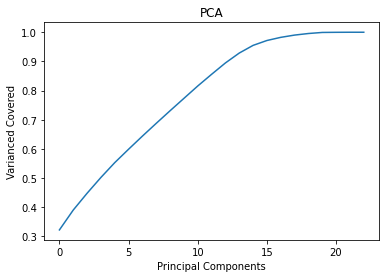

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Varianced Covered')
plt.title('PCA')
plt.show()

Around 16 components are able to explain 95+ variance. it's safe to consider using 16.

In [25]:
pca=PCA(n_components=16 )
new_comp=pca.fit_transform(x_scaled)
x_comp=pd.DataFrame(new_comp,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11',
                                      'PC12','PC13','PC14','PC15',
                                     'PC16'])
x_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,0.059013,-0.508052,0.146012,0.088828,0.197780,0.015229,-0.120996,-0.379265,-0.528511,-0.489653,-0.484133,-0.088887,-0.021198,-0.202935,-0.405948,-0.025850
1,0.053446,-0.507348,0.145119,0.087422,0.194580,0.016205,-0.120861,-0.379894,-0.527714,-0.490399,-0.483249,-0.088465,-0.021231,-0.207408,-0.408775,-0.017763
2,0.135282,-0.519926,0.161759,0.105816,0.237992,-0.002547,-0.127939,-0.370238,-0.542532,-0.487632,-0.497832,-0.093846,-0.032656,-0.175182,-0.379429,-0.045102
3,0.091074,-0.515041,0.154800,0.097936,0.220210,0.003258,-0.125181,-0.374753,-0.536813,-0.489044,-0.492041,-0.090728,-0.028910,-0.193378,-0.390333,-0.067017
4,0.059640,-0.591913,0.192009,0.135177,0.297446,0.036046,-0.344180,-0.047747,-0.090517,-0.239006,0.760956,-0.149783,-0.043224,-0.176750,-0.368448,-0.087503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17646,-0.695536,0.739909,-0.377708,-0.603227,0.515594,-0.051314,-0.040742,0.058842,0.063222,-0.016530,0.001584,-0.025387,0.007761,0.030167,-0.099814,0.016514
17647,-0.721571,0.913188,0.653726,0.068729,-0.146950,-0.009339,0.042458,-0.015919,0.032545,-0.005577,0.046550,-0.023700,0.010032,0.013266,-0.081446,0.027862
17648,-0.564367,0.847751,0.681978,0.090824,-0.114969,-0.009427,0.021409,0.011790,0.047742,0.001531,0.029339,-0.016478,0.003596,0.038336,-0.038136,0.442297
17649,-0.552496,0.850271,0.681178,0.090769,-0.115070,-0.005849,0.023879,0.011982,0.046820,0.002895,0.031128,-0.018598,0.006714,0.054315,-0.028556,0.454890


   # MODEL BUILDING:

In [27]:
## Importing the librabries.
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier
from sklearn. metrics import accuracy_score,classification_report,confusion_matrix

In [28]:
rf=RandomForestClassifier()

In [50]:
#RandomForestClassifier:
for i in range(0,100,4):
    x_train,x_test,y_train,y_test=tts(x_comp,y,test_size=0.25,random_state=i)
    rf.fit(x_train,y_train)
    pred_train=rf.predict(x_train)
    pred_test=rf.predict(x_test)
    print("At random state", i , "The model performs very well")
    print("At random state ", i)
    print("Training accuracy is : ", accuracy_score(y_train,pred_train)*100)
    print("Testing accuracy  is : ", accuracy_score(y_test,pred_test)*100)
    print('\n')

At random state 0 The model performs very well
At random state  0
Training accuracy is :  70.90194893488443
Testing accuracy  is :  41.46838885112169


At random state 4 The model performs very well
At random state  4
Training accuracy is :  71.49116180691948
Testing accuracy  is :  43.23589394969409


At random state 8 The model performs very well
At random state  8
Training accuracy is :  71.25698746034143
Testing accuracy  is :  40.99252209381373


At random state 12 The model performs very well
At random state  12
Training accuracy is :  70.87928690134461
Testing accuracy  is :  41.0151824155903


At random state 16 The model performs very well
At random state  16
Training accuracy is :  71.24187943798157
Testing accuracy  is :  40.76591887604804


At random state 20 The model performs very well
At random state  20
Training accuracy is :  70.96993503550385
Testing accuracy  is :  41.6043507817811


At random state 24 The model performs very well
At random state  24
Training accurac

Random State 84 selected.

In [95]:
x_train,x_test,y_train,y_test=tts(x_comp,y,test_size=0.25,random_state=84)
rf.fit(x_train,y_train)

RandomForestClassifier()

In [96]:
pred_test=rf.predict(x_test)
accuracy_score(y_test,pred_test)

0.6204396102424654

In [97]:
rf_report=pd.DataFrame(classification_report(y_test,pred_test,output_dict=True))
rf_report


,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,accuracy,macro avg,weighted avg
precision,0.616279,0.525000,0.752809,0.560976,0.680556,0.652778,0.865672,0.656250,0.666667,0.559140,...,0.420290,0.464789,0.759036,0.455696,0.979167,0.935065,0.623377,0.62044,0.624291,0.622275
recall,0.746479,0.552632,0.848101,0.522727,0.569767,0.618421,0.734177,0.707865,0.761905,0.584270,...,0.376623,0.388235,0.768293,0.461538,1.000000,0.911392,0.564706,0.62044,0.625399,0.620440
f1-score,0.675159,0.538462,0.797619,0.541176,0.620253,0.635135,0.794521,0.681081,0.711111,0.571429,...,0.397260,0.423077,0.763636,0.458599,0.989474,0.923077,0.592593,0.62044,0.622330,0.618857
support,71.000000,76.000000,79.000000,88.000000,86.000000,76.000000,79.000000,89.000000,84.000000,89.000000,...,77.000000,85.000000,82.000000,78.000000,47.000000,79.000000,85.000000,0.62044,4413.000000,4413.000000


# ROC Score

In [98]:
from sklearn.metrics import roc_auc_score

In [99]:
y_pred_prob=rf.predict_proba(x_test)

In [88]:
roc_auc_score(y_test,y_pred_prob,multi_class='ovr')

0.8720849148600683

# Cross Validation:

In [56]:
pred_rf=rf.predict(x_test)
from sklearn. metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
accuracy_score= accuracy_score(y_test,pred_rf)
for i in range(2,11):
    rf_cv=cross_val_score(rf,x_comp,y,cv=i)
    cv_mean=rf_cv.mean()
    print("at cv :-",i)
    print("cross validation score is ", cv_mean)
    print("accuracy score is ", accuracy_score)
    print('\n')

at cv :- 2
cross validation score is  0.05223541827551742
accuracy score is  0.4298663041015182


at cv :- 3
cross validation score is  0.13500530917125966
accuracy score is  0.4298663041015182


at cv :- 4
cross validation score is  0.1540966852037549
accuracy score is  0.4298663041015182


at cv :- 5
cross validation score is  0.18089494666021633
accuracy score is  0.4298663041015182


at cv :- 6
cross validation score is  0.18588016935219606
accuracy score is  0.4298663041015182


at cv :- 7
cross validation score is  0.20383488114138282
accuracy score is  0.4298663041015182


at cv :- 8
cross validation score is  0.2061536101853453
accuracy score is  0.4298663041015182


at cv :- 9
cross validation score is  0.20751580730808705
accuracy score is  0.4298663041015182


at cv :- 10
cross validation score is  0.20700939046965178
accuracy score is  0.4298663041015182




cv=10 selected

# Hyperparameter Tunning

In [57]:
from sklearn.model_selection import RandomizedSearchCV
rf=RandomForestClassifier()
parameters={'criterion':['gini','entropy'],'n_estimators':list(range(2,21)),
           'min_samples_split':list(range(2,40)),
           'min_samples_leaf':list(range(2,30)),
          'random_state':list(range(1,11)),
          'max_depth':list(range(4,20))}
clf=RandomizedSearchCV(rf,parameters,cv=10)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'random_state': 5, 'n_estimators': 16, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_depth': 17, 'criterion': 'entropy'}


In [58]:
from sklearn.metrics import f1_score,accuracy_score,classification_report,confusion_matrix
rf=RandomForestClassifier(random_state=5,n_estimators=16,min_samples_split=3,min_samples_leaf=2,max_depth=17,
                          criterion='entropy')
rf.fit(x_train,y_train)
pred_train=rf.predict(x_train)
pred_test=rf.predict(x_test)
print('The accuracy score is :', accuracy_score(y_test,pred_test))


The accuracy score is : 0.5588035350101972


In [59]:
rf_report=pd.DataFrame(classification_report(y_test,pred_test,output_dict=True))
rf_report

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,accuracy,macro avg,weighted avg
precision,0.691358,0.431579,0.673913,0.565217,0.523810,0.536585,0.739130,0.552381,0.591398,0.505263,...,0.414634,0.457143,0.643678,0.346154,0.979167,0.884615,0.536585,0.558804,0.563258,0.560948
recall,0.788732,0.539474,0.784810,0.443182,0.511628,0.578947,0.645570,0.651685,0.654762,0.539326,...,0.441558,0.376471,0.682927,0.346154,1.000000,0.873418,0.517647,0.558804,0.564989,0.558804
f1-score,0.736842,0.479532,0.725146,0.496815,0.517647,0.556962,0.689189,0.597938,0.621469,0.521739,...,0.427673,0.412903,0.662722,0.346154,0.989474,0.878981,0.526946,0.558804,0.560816,0.556494
support,71.000000,76.000000,79.000000,88.000000,86.000000,76.000000,79.000000,89.000000,84.000000,89.000000,...,77.000000,85.000000,82.000000,78.000000,47.000000,79.000000,85.000000,0.558804,4413.000000,4413.000000


# Decision Tree Classifier

In [60]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [61]:
#DecisionTreeClassifier:
for i in range(0,100,4):
    x_train,x_test,y_train,y_test=tts(x_comp,y,test_size=0.25,random_state=i)
    dt.fit(x_train,y_train)
    pred_train=dt.predict(x_train)
    pred_test=dt.predict(x_test)
    print("At random state", i , "The model performs very well")
    print("At random state ", i)
    print("Training accuracy is : ", accuracy_score(y_train,pred_train)*100)
    print("Testing accuracy  is : ", accuracy_score(y_test,pred_test)*100)
    print('\n')

At random state 0 The model performs very well
At random state  0
Training accuracy is :  100.0
Testing accuracy  is :  45.52458644912758


At random state 4 The model performs very well
At random state  4
Training accuracy is :  100.0
Testing accuracy  is :  46.498980285520055


At random state 8 The model performs very well
At random state  8
Training accuracy is :  100.0
Testing accuracy  is :  43.53047813278948


At random state 12 The model performs very well
At random state  12
Training accuracy is :  100.0
Testing accuracy  is :  45.00339904826649


At random state 16 The model performs very well
At random state  16
Training accuracy is :  100.0
Testing accuracy  is :  45.9551325628824


At random state 20 The model performs very well
At random state  20
Training accuracy is :  100.0
Testing accuracy  is :  45.1393609789259


At random state 24 The model performs very well
At random state  24
Training accuracy is :  100.0
Testing accuracy  is :  45.68320870156356


At random sta

random state=76 selected.

In [100]:
x_train,x_test,y_train,y_test=tts(x_comp,y,test_size=0.25,random_state=76)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=9, max_leaf_nodes=17, min_samples_leaf=29,
                       min_samples_split=10, random_state=5)

In [101]:
pred_test=dt.predict(x_test)
accuracy_score(y_test,pred_test)

0.10242465443009291

In [102]:
dt_report=pd.DataFrame(classification_report(y_test,pred_test,output_dict=True))
dt_report


,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,accuracy,macro avg,weighted avg
precision,0.0,0.0,0.126697,0.0,0.0,0.0,0.0,0.666667,0.206186,0.0,...,0.0,0.0,0.085586,0.0,0.965517,0.181818,0.0,0.102425,0.062058,0.054510
recall,0.0,0.0,0.691358,0.0,0.0,0.0,0.0,0.206186,0.266667,0.0,...,0.0,0.0,0.256757,0.0,0.682927,0.031250,0.0,0.102425,0.109615,0.102425
f1-score,0.0,0.0,0.214149,0.0,0.0,0.0,0.0,0.314961,0.232558,0.0,...,0.0,0.0,0.128378,0.0,0.800000,0.053333,0.0,0.102425,0.060628,0.053656
support,98.0,84.0,81.000000,84.0,92.0,74.0,82.0,97.000000,75.000000,76.0,...,79.0,87.0,74.000000,73.0,41.000000,64.000000,77.0,0.102425,4413.000000,4413.000000


# ROC Score

In [103]:
from sklearn.metrics import roc_auc_score

In [104]:
y_pred_prob=dt.predict_proba(x_test)

In [105]:
roc_auc_score(y_test,y_pred_prob,multi_class='ovr')

0.8126748741330672

# Cross Validation:

In [69]:
pred_dt=dt.predict(x_test)
from sklearn. metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
accuracy_score= accuracy_score(y_test,pred_dt)
for i in range(2,11):
    rf_cv=cross_val_score(dt,x_comp,y,cv=i)
    cv_mean=rf_cv.mean()
    print("at cv :-",i)
    print("cross validation score is ", cv_mean)
    print("accuracy score is ", accuracy_score)
    print('\n')

at cv :- 2
cross validation score is  0.059146078191590776
accuracy score is  0.4615907545887152


at cv :- 3
cross validation score is  0.12208763539523003
accuracy score is  0.4615907545887152


at cv :- 4
cross validation score is  0.15149127464618156
accuracy score is  0.4615907545887152


at cv :- 5
cross validation score is  0.16423905465392322
accuracy score is  0.4615907545887152


at cv :- 6
cross validation score is  0.16967742288421284
accuracy score is  0.4615907545887152


at cv :- 7
cross validation score is  0.17494332303338708
accuracy score is  0.4615907545887152


at cv :- 8
cross validation score is  0.1876308373053513
accuracy score is  0.4615907545887152


at cv :- 9
cross validation score is  0.19590489456625282
accuracy score is  0.4615907545887152


at cv :- 10
cross validation score is  0.18831529777124725
accuracy score is  0.4615907545887152




cv= 9 selected

# tunning

In [72]:
from sklearn.model_selection import RandomizedSearchCV
rf=RandomForestClassifier()
parameters={'criterion':['gini','entropy'],
           'min_samples_split':list(range(2,40)),
           'min_samples_leaf':list(range(2,30)),
          'random_state':list(range(1,11)),
          'max_depth':list(range(4,20)),
           'max_leaf_nodes':list(range(2,30))}
clf=RandomizedSearchCV(dt,parameters,cv=9)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'random_state': 5, 'min_samples_split': 10, 'min_samples_leaf': 29, 'max_leaf_nodes': 17, 'max_depth': 9, 'criterion': 'gini'}


In [73]:
from sklearn.metrics import f1_score,accuracy_score,classification_report,confusion_matrix
dt=DecisionTreeClassifier(random_state=5,min_samples_split=10,min_samples_leaf=29,max_depth=9,
                          criterion='gini',max_leaf_nodes=17)
dt.fit(x_train,y_train)
pred_train=dt.predict(x_train)
pred_test=dt.predict(x_test)
print('The accuracy score is :', accuracy_score(y_test,pred_test))

The accuracy score is : 0.10242465443009291


# KNN Classifier

In [74]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [75]:
#KNeighborsClassifier:
for i in range(0,100,4):
    x_train,x_test,y_train,y_test=tts(x_comp,y,test_size=0.25,random_state=i)
    knn.fit(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    print("At random state", i , "The model performs very well")
    print("At random state ", i)
    print("Training accuracy is : ", accuracy_score(y_train,pred_train)*100)
    print("Testing accuracy  is : ", accuracy_score(y_test,pred_test)*100)
    print('\n')

At random state 0 The model performs very well
At random state  0
Training accuracy is :  65.11557637105302
Testing accuracy  is :  35.984590981191936


At random state 4 The model performs very well
At random state  4
Training accuracy is :  64.45082338721862
Testing accuracy  is :  37.00430546113755


At random state 8 The model performs very well
At random state  8
Training accuracy is :  65.15334642695271
Testing accuracy  is :  36.34715612961704


At random state 12 The model performs very well
At random state  12
Training accuracy is :  64.760537845596
Testing accuracy  is :  36.845683208701566


At random state 16 The model performs very well
At random state  16
Training accuracy is :  64.98715818099411
Testing accuracy  is :  35.893949694085656


At random state 20 The model performs very well
At random state  20
Training accuracy is :  64.79075389031576
Testing accuracy  is :  37.50283254022207


At random state 24 The model performs very well
At random state  24
Training accu

random state 84 selected.

In [76]:
x_train,x_test,y_train,y_test=tts(x_comp,y,test_size=0.25,random_state=84)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [77]:
pred_test=knn.predict(x_test)
accuracy_score(y_test,pred_test)

0.3870382959438024

In [78]:
knn_report=pd.DataFrame(classification_report(y_test,pred_test,output_dict=True))
knn_report


,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,accuracy,macro avg,weighted avg
precision,0.429752,0.317829,0.519231,0.340206,0.379310,0.411765,0.439560,0.448276,0.448000,0.280374,...,0.291667,0.345455,0.589286,0.282609,0.897959,0.909091,0.363636,0.387038,0.399146,0.395698
recall,0.732394,0.539474,0.683544,0.375000,0.511628,0.460526,0.506329,0.584270,0.666667,0.337079,...,0.181818,0.223529,0.402439,0.166667,0.936170,0.379747,0.188235,0.387038,0.394004,0.387038
f1-score,0.541667,0.400000,0.590164,0.356757,0.435644,0.434783,0.470588,0.507317,0.535885,0.306122,...,0.224000,0.271429,0.478261,0.209677,0.916667,0.535714,0.248062,0.387038,0.386077,0.380917
support,71.000000,76.000000,79.000000,88.000000,86.000000,76.000000,79.000000,89.000000,84.000000,89.000000,...,77.000000,85.000000,82.000000,78.000000,47.000000,79.000000,85.000000,0.387038,4413.000000,4413.000000


## ROC Score

In [89]:
from sklearn.metrics import roc_auc_score

In [85]:
y_pred_prob=knn.predict_proba(x_test)

In [88]:
roc_auc_score(y_test,y_pred_prob,multi_class='ovr')

0.8720849148600683

# Cross Validation

In [79]:
pred_knn=knn.predict(x_test)
from sklearn. metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
accuracy_score= accuracy_score(y_test,pred_knn)
for i in range(2,11):
    knn_cv=cross_val_score(knn,x_comp,y,cv=i)
    cv_mean=knn_cv.mean()
    print("at cv :-",i)
    print("cross validation score is ", cv_mean)
    print("accuracy score is ", accuracy_score)
    print('\n')

at cv :- 2
cross validation score is  0.02050919604644788
accuracy score is  0.3870382959438024


at cv :- 3
cross validation score is  0.10305180955361169
accuracy score is  0.3870382959438024


at cv :- 4
cross validation score is  0.12293793383062776
accuracy score is  0.3870382959438024


at cv :- 5
cross validation score is  0.12282353866161548
accuracy score is  0.3870382959438024


at cv :- 6
cross validation score is  0.12141034036481346
accuracy score is  0.3870382959438024


at cv :- 7
cross validation score is  0.1222000967336029
accuracy score is  0.3870382959438024


at cv :- 8
cross validation score is  0.12519743698550848
accuracy score is  0.3870382959438024


at cv :- 9
cross validation score is  0.11670137623631363
accuracy score is  0.3870382959438024


at cv :- 10
cross validation score is  0.11999092072801003
accuracy score is  0.3870382959438024




# Hyper parameter tunning

In [80]:
from sklearn.model_selection import RandomizedSearchCV
knn=KNeighborsClassifier()
parameters={'algorithm':['kd_tree','brute'],
           'leaf_size':list(range(2,30)),
           'n_neighbors':[3,5,7,9,11,13]}
clf=RandomizedSearchCV(knn,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'n_neighbors': 3, 'leaf_size': 14, 'algorithm': 'kd_tree'}


In [82]:
from sklearn.metrics import f1_score,accuracy_score,classification_report,confusion_matrix
knn=KNeighborsClassifier(n_neighbors=3,leaf_size=1,
                        algorithm='kd_tree')
knn.fit(x_train,y_train)
pred_train=knn.predict(x_train)
pred_test=knn.predict(x_test)
print('The accuracy score is :', accuracy_score(y_test,pred_test))

The accuracy score is : 0.48900974393836394


### We build multiple problem but Random Forest Give us the best result.


# ModelSaving

In [83]:
import pickle
filename='AvacadoRegionPrediction.pkl'
pickle.dump(rf,open(filename,'wb'))